**Deep Learning Project**

**Weather Bench2**

**Mayra Suarez and Salam ALKAISSI**


In [ ]:
import dask
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
pip install cfgrib

In [ ]:
import os
import xarray as xr
from google.colab import drive
import xarray as xr
import cfgrib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xarray as xr
import cfgrib

t2m_data = xr.open_dataset("/content/drive/MyDrive/Weather_forcast/data.grib", engine="cfgrib")

In [ ]:
t2m_data

<xarray.Dataset> Size: 18MB
Dimensions:     (time: 2105, latitude: 36, longitude: 59)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 17kB 2022-01-01T07:00:00 ... 2024-11-18...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 288B 51.05 50.8 50.55 ... 42.8 42.55 42.3
  * longitude   (longitude) float64 472B -5.1 -4.85 -4.6 -4.35 ... 8.9 9.15 9.4
    valid_time  (time) datetime64[ns] 17kB ...
Data variables:
    t2m         (time, latitude, longitude) float32 18MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-13T14:11 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
# Select only the 't2m' variable and convert from Kelvin to Celsius
t2m_data = (t2m_data['t2m'] - 273.15)



In [ ]:
# # Convert the DataArray to a Pandas DataFrame
# t2m_df = t2m_data.to_dataframe().reset_index()

# # Save the DataFrame to a text file
# output_file_path = "/content/drive/MyDrive/Weather_forcast/t2m_data.csv"  # Change the path as needed
# t2m_df.to_csv(output_file_path, sep='\t', index=False)

# print(f"Data exported to {output_file_path}")

**Initial Data Distribution ( by t2m: Temperature)**

t2m min: -27.662811279296875
t2m max: 41.849273681640625
Start time: 2022-01-01T07:00:00.000000000
End time: 2024-11-18T07:00:00.000000000
Mean t2m value: 13.00161361694336 °C


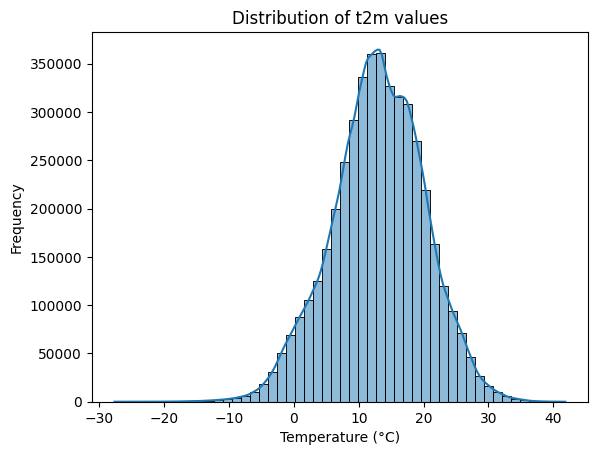

In [ ]:

# Inspect the range of t2m values
print("t2m min:", t2m_data.min().item())
print("t2m max:", t2m_data.max().item())

# Check the time range
print("Start time:", t2m_data['time'].values[0])
print("End time:", t2m_data['time'].values[-1])

# Calculate the mean value
t2m_mean = t2m_data.mean().item()

# Print the calculated mean
print("Mean t2m value:", t2m_mean, "°C")


# Visualize the distribution of t2m values
sns.histplot(t2m_data.values.flatten(), bins=50, kde=True)
plt.title("Distribution of t2m values")
plt.xlabel("Temperature (°C)")  # Update units to Celsius
plt.ylabel("Frequency")
plt.show()



In [ ]:
# Sort latitude in increasing order
t2m_data_sorted = t2m_data.sortby('latitude')

# Verify the sorted dataset
print(t2m_data_sorted)


<xarray.DataArray 't2m' (time: 2105, latitude: 36, longitude: 59)> Size: 18MB
array([[[ 3.4896545,  3.498932 ,  3.8006897, ...,  7.011139 ,
          6.7694397,  9.663483 ],
        [ 5.4549866,  6.2015686,  5.2694397, ...,  9.598053 ,
          9.48819  , 10.9305725],
        [ 6.3490295,  6.4637756,  5.622467 , ..., 11.8055725,
         11.873444 , 12.495026 ],
        ...,
        [13.847076 , 13.712799 , 13.495514 , ..., 10.140045 ,
          9.69278  ,  9.413971 ],
        [13.897369 , 13.791901 , 13.609772 , ..., 10.322174 ,
         10.273346 , 10.178619 ],
        [13.941803 , 13.885651 , 13.864166 , ..., 10.386139 ,
         10.54483  , 10.571686 ]],

       [[11.0416565, 12.206207 , 12.494293 , ...,  9.88736  ,
         10.098297 , 11.761871 ],
        [10.9479065, 12.681793 , 12.126617 , ..., 11.125641 ,
         11.655914 , 12.364899 ],
        [10.67691  , 11.630524 , 11.215973 , ..., 11.979645 ,
         12.158356 , 12.389801 ],
...
        [11.922028 , 11.253082 , 10.507

In [ ]:
# Fill missing values with the mean value
t2m_data_filled = t2m_data_sorted.fillna(t2m_data_sorted.mean(skipna=True))

# Verify the filled data
print(t2m_data_filled)


<xarray.DataArray 't2m' (time: 2105, latitude: 36, longitude: 59)> Size: 18MB
array([[[ 3.4896545,  3.498932 ,  3.8006897, ...,  7.011139 ,
          6.7694397,  9.663483 ],
        [ 5.4549866,  6.2015686,  5.2694397, ...,  9.598053 ,
          9.48819  , 10.9305725],
        [ 6.3490295,  6.4637756,  5.622467 , ..., 11.8055725,
         11.873444 , 12.495026 ],
        ...,
        [13.847076 , 13.712799 , 13.495514 , ..., 10.140045 ,
          9.69278  ,  9.413971 ],
        [13.897369 , 13.791901 , 13.609772 , ..., 10.322174 ,
         10.273346 , 10.178619 ],
        [13.941803 , 13.885651 , 13.864166 , ..., 10.386139 ,
         10.54483  , 10.571686 ]],

       [[11.0416565, 12.206207 , 12.494293 , ...,  9.88736  ,
         10.098297 , 11.761871 ],
        [10.9479065, 12.681793 , 12.126617 , ..., 11.125641 ,
         11.655914 , 12.364899 ],
        [10.67691  , 11.630524 , 11.215973 , ..., 11.979645 ,
         12.158356 , 12.389801 ],
...
        [11.922028 , 11.253082 , 10.507

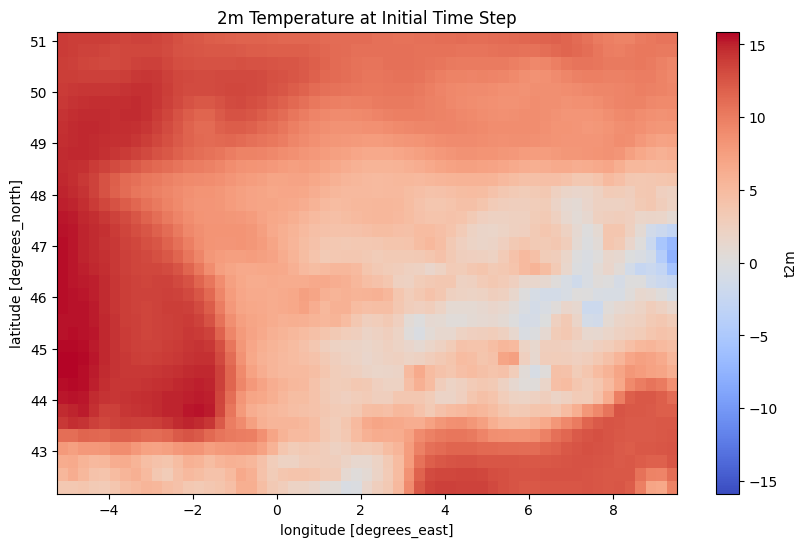

In [ ]:
import matplotlib.pyplot as plt

# Plot the 2m temperature data at the first time step
# t2m_data_filled.isel(time=0).t2m.plot(figsize=(10, 6), cmap='coolwarm')
t2m_data_filled.isel(time=0).plot(figsize=(10, 6), cmap='coolwarm')

plt.title('2m Temperature at Initial Time Step')
plt.show()






In [ ]:


# Compute basic statistics while ignoring NaN values
t2m_mean = t2m_data_filled.mean(dim=['time', 'latitude', 'longitude'], skipna=True).compute()
t2m_min = t2m_data_filled.min(dim=['time', 'latitude', 'longitude'], skipna=True).compute()
t2m_max = t2m_data_filled.max(dim=['time', 'latitude', 'longitude'], skipna=True).compute()
t2m_std = t2m_data_filled.std(dim=['time', 'latitude', 'longitude'], skipna=True).compute()

# Print the calculated statistics
print(f"Mean: {t2m_mean:.2f}°C")
print(f"Min: {t2m_min:.2f}°C")
print(f"Max: {t2m_max:.2f}°C")
print(f"Standard Deviation: {t2m_std:.2f}°C")



Mean: 13.00°C
Min: -27.66°C
Max: 41.85°C
Standard Deviation: 7.16°C


In [ ]:
# t2m_point.tail(2)


**Time Series of 't2m' for a Specific Location**





**Chosen Location: Mont Blanc, Alps** (France/Italy border)
**Coordinates: Approximately 45.832° N, 6.865° E.**
Altitude: 4,809 meters (highest peak in Western Europe).
Why Mont Blanc?

Extreme Weather: Mont Blanc experiences rapidly changing weather conditions, including heavy snowfall, strong winds, and freezing temperatures, even in summer.
High Altitude: Offers an opportunity to explore how well the dataset represents weather conditions in mountainous regions.
Regional Relevance: Located within the dataset's latitude and longitude range, it fits well for high-resolution weather analysis.



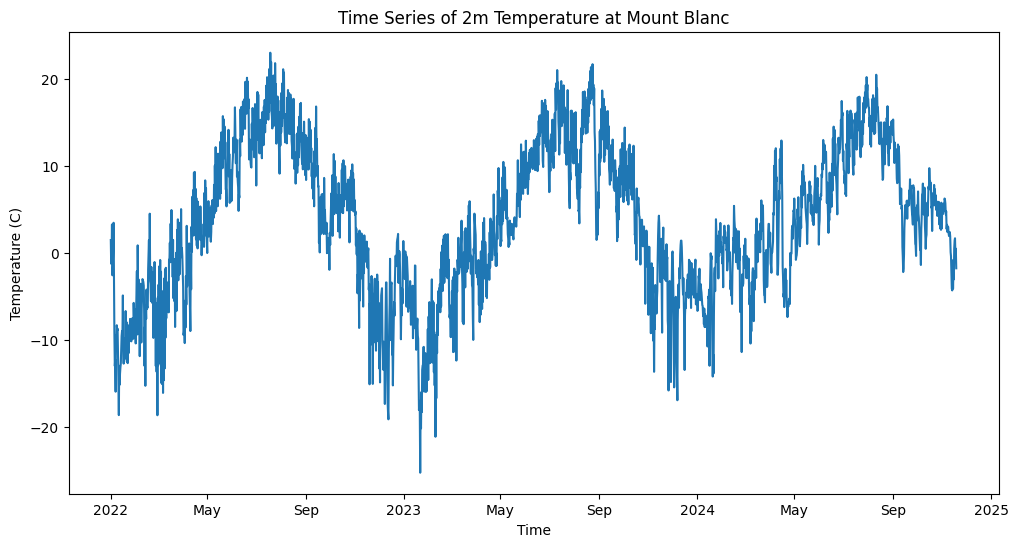

In [ ]:
# Selecting a specific latitude and longitude point
t2m_point = t2m_data.sel(latitude= 45.832, longitude= 6.865, method="nearest")

# # Extract the 't2m' variable for the selected point
t2m_point_t2m = t2m_point

# Plot the time series for the selected location
t2m_point_t2m.plot(figsize=(12, 6))
plt.title('Time Series of 2m Temperature at Mount Blanc')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.show()





t2m min: -25.265350341796875
t2m max: 23.049468994140625
Start time: 2022-01-01T07:00:00.000000000
End time: 2024-11-18T07:00:00.000000000
Mean t2m value: 3.5918643474578857 °C


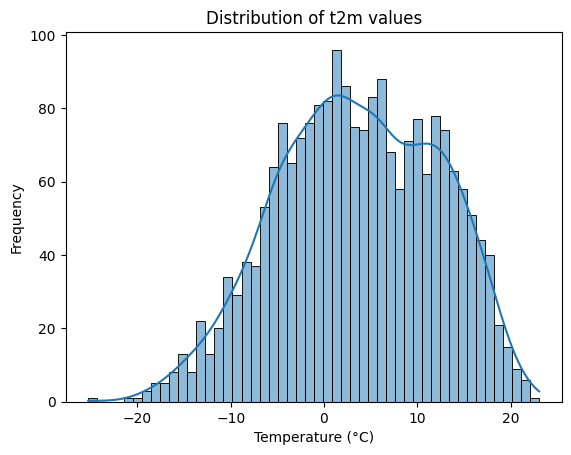

In [ ]:

# Inspect the range of t2m values for the specific point
print("t2m min:", t2m_point.min().item())
print("t2m max:", t2m_point.max().item())

# Check the time range
print("Start time:", t2m_point['time'].values[0])
print("End time:", t2m_point['time'].values[-1])

# Calculate the mean value
t2m_mean = t2m_point.mean().item()

# Print the calculated mean
print("Mean t2m value:", t2m_mean, "°C")

# Visualize the distribution of t2m values
sns.histplot(t2m_point.values.flatten(), bins=50, kde=True)
plt.title("Distribution of t2m values")
plt.xlabel("Temperature (°C)")  # Update units to Celsius
plt.ylabel("Frequency")
plt.show()

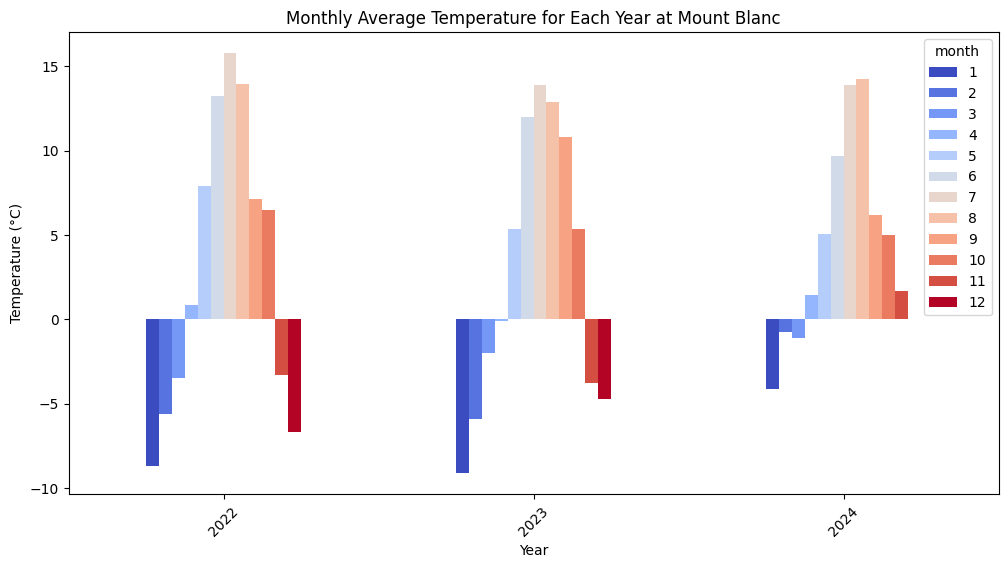

In [ ]:
import matplotlib.pyplot as plt

# Extract 'year' and 'month' directly from the 'time' coordinate
t2m_point['year'] = t2m_point['time'].dt.year
t2m_point['month'] = t2m_point['time'].dt.month

# Group data by 'year' and 'month', and calculate the mean temperature
monthly_avg_temp_by_year = t2m_point.groupby(['year', 'month']).mean()

# Convert to pandas DataFrame for easier plotting
monthly_avg_temp_df = monthly_avg_temp_by_year.to_dataframe().reset_index()

# Pivot the table to get months as columns and years as rows
monthly_avg_temp_pivot = monthly_avg_temp_df.pivot(index='year', columns='month', values='t2m')

# Plot the monthly average temperatures for each year
monthly_avg_temp_pivot.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Monthly Average Temperature for Each Year at Mount Blanc')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()





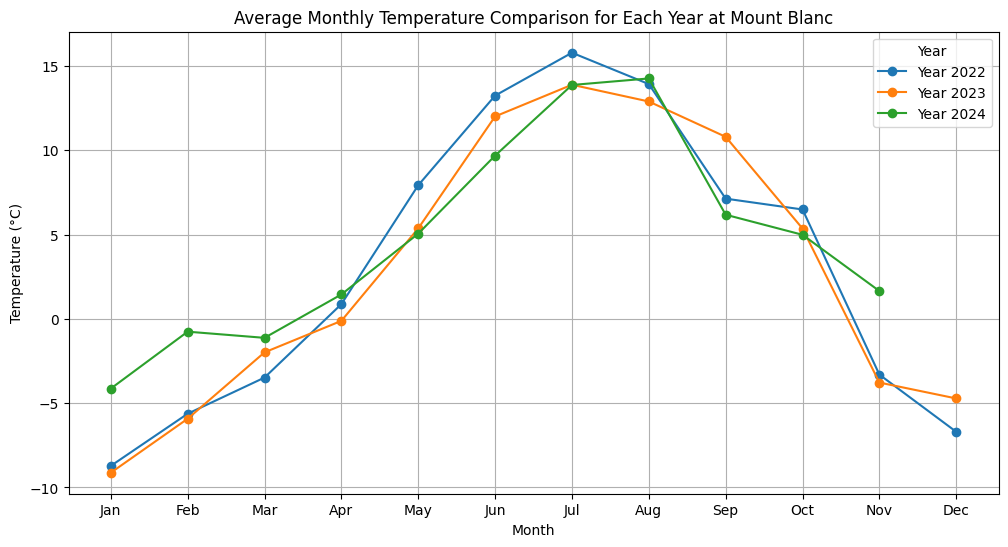

In [ ]:
# Group the data by year and month to calculate the average temperature
monthly_avg_temp_by_year = t2m_point.groupby(['year', 'month']).mean()

# Convert to a pandas DataFrame for easier plotting
monthly_avg_temp_df = monthly_avg_temp_by_year.to_dataframe().reset_index()

# Plot the monthly average temperature for each year
plt.figure(figsize=(12, 6))

# Loop through each unique year and plot the data
for year in monthly_avg_temp_df['year'].unique():
    # Filter data for each year
    year_data = monthly_avg_temp_df[monthly_avg_temp_df['year'] == year]
    plt.plot(year_data['month'], year_data['t2m'], label=f'Year {year}', marker='o')

# Customizing the plot
plt.title('Average Monthly Temperature Comparison for Each Year at Mount Blanc')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()



We can detect by the time series graph that the behaviour is stationary, reaching peaks in the end of June and July and the lowest being month of January

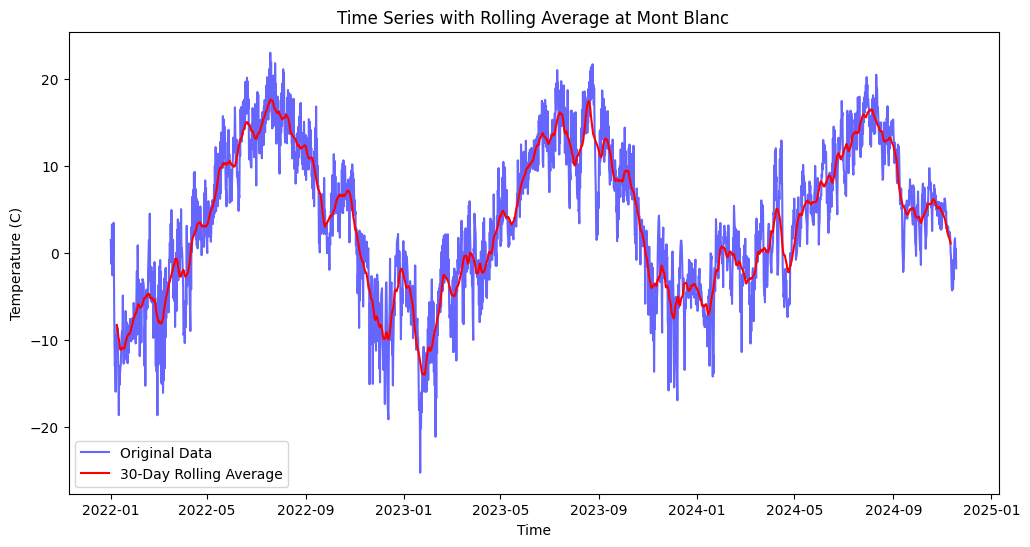

In [ ]:
# Compute a 30-day rolling average of the time series
rolling_avg = t2m_point.rolling(time=30, center=True).mean()

# Plot the original time series and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(t2m_point['time'], t2m_point, label='Original Data', alpha=0.6, color='blue')
plt.plot(rolling_avg['time'], rolling_avg, label='30-Day Rolling Average', color='red')
plt.title('Time Series with Rolling Average at Mont Blanc')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()




<ipython-input-281-8ca4b19c3b5d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=t2m_point_t2m_df, x='Month', y='t2m', palette='coolwarm')


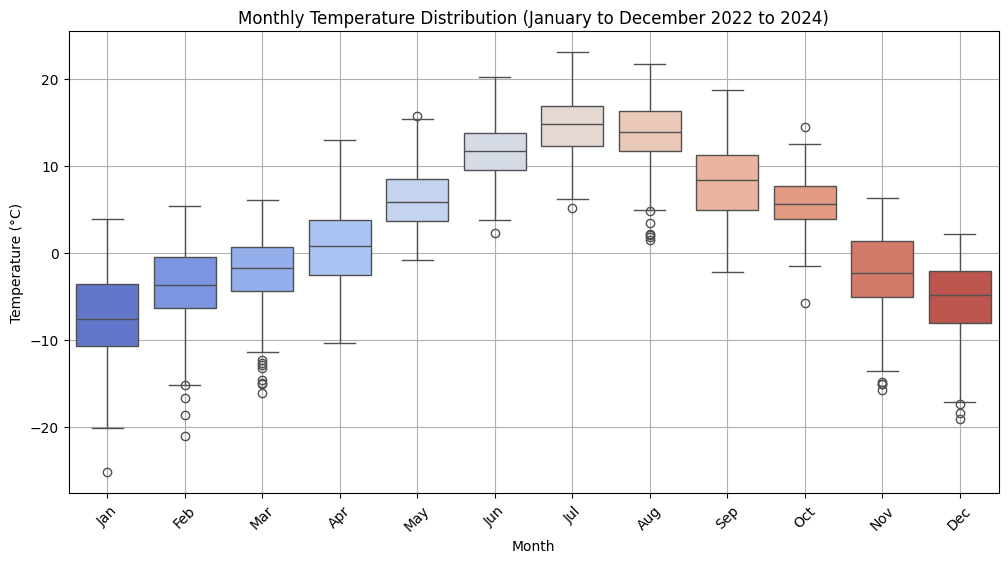

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert xarray DataArray to pandas DataFrame
t2m_point_t2m_df = t2m_point.to_dataframe().reset_index()

# Extract month and year from the 'time' coordinate
t2m_point_t2m_df['Month'] = t2m_point_t2m_df['time'].dt.strftime('%b')  # Short month name
t2m_point_t2m_df['Year'] = t2m_point_t2m_df['time'].dt.year

# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Ensure months are ordered correctly
t2m_point_t2m_df['Month'] = pd.Categorical(t2m_point_t2m_df['Month'], categories=month_order, ordered=True)

# Sort by year and month for chronological order
t2m_point_t2m_df = t2m_point_t2m_df.sort_values(['Year', 'Month'])

# Create a box plot for monthly temperature distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=t2m_point_t2m_df, x='Month', y='t2m', palette='coolwarm')

# Customize plot
plt.title('Monthly Temperature Distribution (January to December 2022 to 2024)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




<ipython-input-282-9abc2fa742e5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=t2m_last_year_df, x='Month', y='t2m', palette='coolwarm')


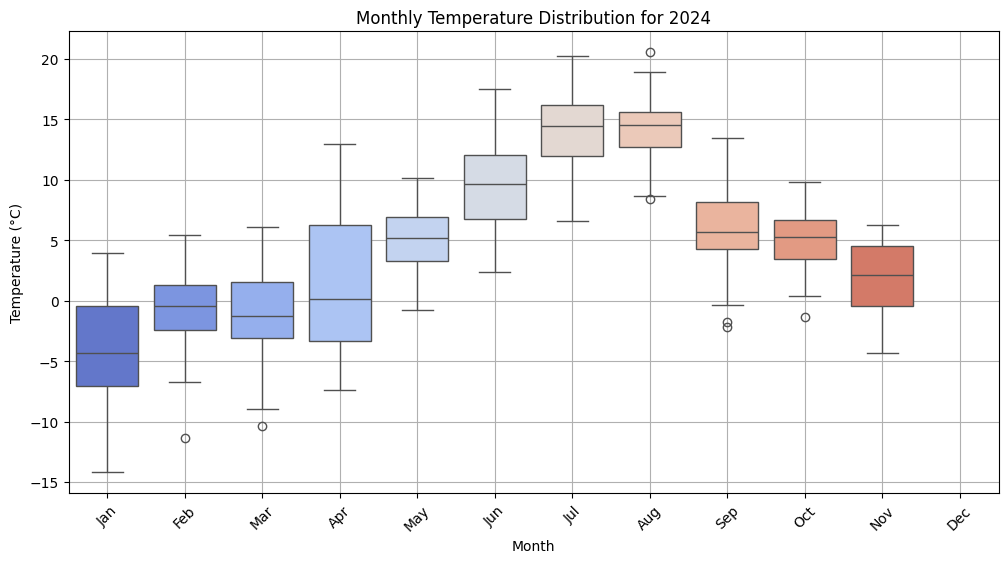

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert xarray DataArray to pandas DataFrame
t2m_point_t2m_df = t2m_point.to_dataframe().reset_index()

# Extract month and year from the 'time' coordinate
t2m_point_t2m_df['Month'] = t2m_point_t2m_df['time'].dt.strftime('%b')  # Short month name
t2m_point_t2m_df['Year'] = t2m_point_t2m_df['time'].dt.year

# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Ensure months are ordered correctly
t2m_point_t2m_df['Month'] = pd.Categorical(t2m_point_t2m_df['Month'], categories=month_order, ordered=True)

# Filter for the last year
last_year = t2m_point_t2m_df['Year'].max()  # Get the most recent year in the data
t2m_last_year_df = t2m_point_t2m_df[t2m_point_t2m_df['Year'] == last_year]

# Sort by month for chronological order
t2m_last_year_df = t2m_last_year_df.sort_values(['Month'])

# Create a box plot for monthly temperature distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=t2m_last_year_df, x='Month', y='t2m', palette='coolwarm')

# Customize plot
plt.title(f'Monthly Temperature Distribution for {last_year}')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-283-96ed9b81019f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=nov_dec_avg_temp, x='YearMonth', y='t2m', palette='coolwarm', legend = False)


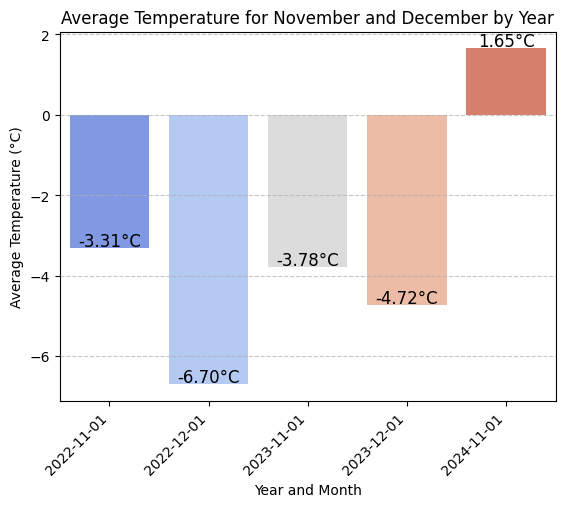

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for November and December data
nov_dec_data = t2m_point_t2m_df[t2m_point_t2m_df['Month'].isin(['Nov', 'Dec'])].copy()

# Combine Year and Month into a single column for better labeling
nov_dec_data.loc[:, 'YearMonth'] = nov_dec_data['Month'].astype(str) + ' ' + nov_dec_data['Year'].astype(str)

# Convert 'YearMonth' to datetime to ensure proper ordering
nov_dec_data.loc[:, 'YearMonth'] = pd.to_datetime(nov_dec_data['YearMonth'], format='%b %Y')

# Aggregate data to compute the mean temperature for each Year-Month
nov_dec_avg_temp = nov_dec_data.groupby('YearMonth')['t2m'].mean().reset_index()

# Sort by 'YearMonth'
nov_dec_avg_temp = nov_dec_avg_temp.sort_values('YearMonth')

# Create a bar plot
ax = sns.barplot(data=nov_dec_avg_temp, x='YearMonth', y='t2m', palette='coolwarm', legend = False)

# Add temperature values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}°C',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Customize plot
plt.title('Average Temperature for November and December by Year')
plt.xlabel('Year and Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()







The temperature generally increases from January to July or August, then begins to decline toward November, indicating a typical seasonal temperature cycle.
Months like July and August show less variability, suggesting more stable temperatures during the summer.

March to May and September to November show transitions in temperature patterns, with wider variability as the seasons shift.


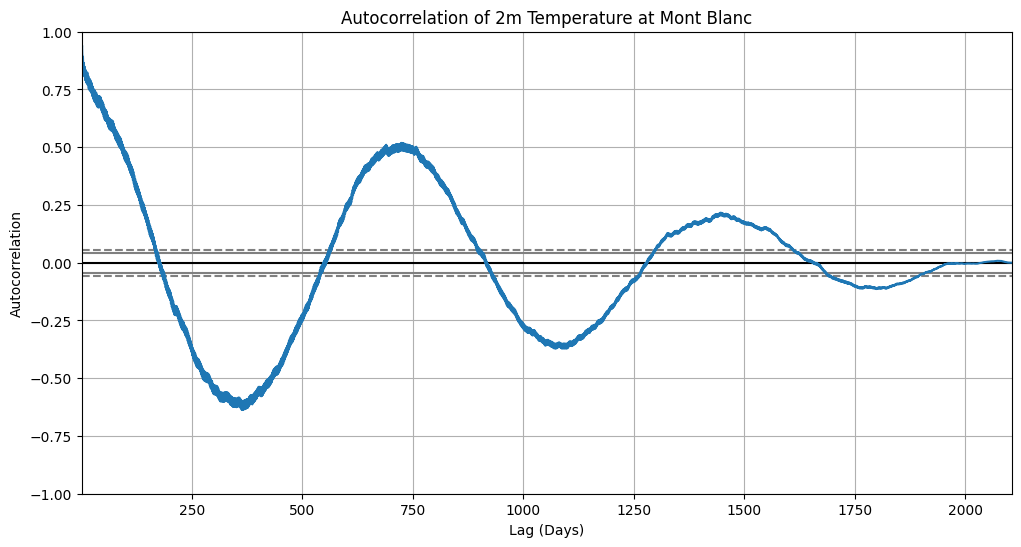

In [ ]:
from pandas.plotting import autocorrelation_plot

# Convert the xarray data to pandas for plotting
t2m_series = t2m_point.to_pandas()

# Plot the autocorrelation
plt.figure(figsize=(12, 6))
autocorrelation_plot(t2m_series)
plt.title('Autocorrelation of 2m Temperature at Mont Blanc')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.show()




The autocorrelation function displays a cyclic pattern, indicating periodicity in the temperature data. Peaks and troughs repeat at regular intervals, which suggests a seasonal cycle or some form of regular variation in temperature.

The temperature at this location exhibits strong periodic trends, possibly annual (365 days) or sub-annual cycles.

In [ ]:
t2m_point

<xarray.DataArray 't2m' (time: 2105)> Size: 8kB
array([ 1.5003967 , -1.2234802 , -0.38583374, ..., -0.49398804,
        0.5133362 , -1.7518005 ], dtype=float32)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 17kB 2022-01-01T07:00:00 ... 2024-11-18...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    latitude    float64 8B 45.8
    longitude   float64 8B 6.9
    valid_time  (time) datetime64[ns] 17kB ...
    year        (time) int64 17kB 2022 2022 2022 2022 ... 2024 2024 2024 2024
    month       (time) int64 17kB 1 1 1 1 1 1 1 1 1 ... 11 11 11 11 11 11 11 11

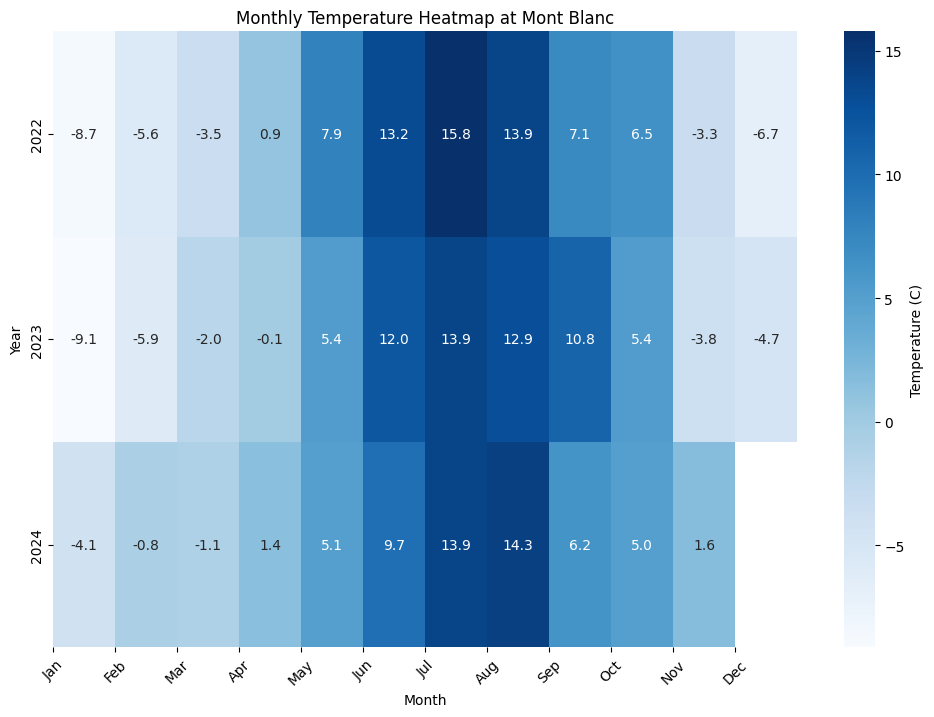

In [ ]:
# Reshape data and calculate the mean temperature for each Year-Month combination
t2m_point_t2m_df['Year'] = t2m_point_t2m_df['time'].dt.year
t2m_point_t2m_df['Month'] = t2m_point_t2m_df['time'].dt.month

# Group by Year and Month, then calculate the mean temperature
heatmap_data = t2m_point_t2m_df.groupby(['Year', 'Month'])['t2m'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True ,fmt=".1f", cbar_kws={'label': 'Temperature (C)'})
plt.title('Monthly Temperature Heatmap at Mont Blanc')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()





**Data Preprocessing**

latitude = 45.832
longitude = 6.865

In [ ]:
# Selecting a specific latitude and longitude point
t2m_point = t2m_data.sel(latitude=45.832, longitude=6.865, method="nearest")

# # Extract the 't2m' variable for the selected point
t2m_point_t2m = t2m_point

# Convert the selected point to NumPy (time series)
t2m_np = t2m_point_t2m.compute().values  # Convert to NumPy array


*Normalize the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max normalization to the data
scaler = MinMaxScaler(feature_range=(0, 1))
t2m_np_scaled = scaler.fit_transform(t2m_np.reshape(-1, 1))  # Reshape for scaling


In [ ]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]  # Last seq_length days as features
        y = data[i+seq_length]    # The next day's value as the target
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Define the sequence length (e.g., 30 time steps)
seq_length = 24  # For example, 24 time steps (could represent 24 hours)

# Generate the sequences
X, y = create_sequences(t2m_np_scaled, seq_length)

# Reshape X to (samples, seq_length, 1) for LSTM or GRU
X = np.expand_dims(X, axis=-1)  # Adds a feature dimension (e.g., 1 feature per time step)
y = np.reshape(y, (-1, 1))      # Reshape y to a 2D array for consistency with the model


Divide the Datasets


*   70% for training
*   20% for validation
*   10% for testing





In [ ]:
# Define split indices for train, validation, and test sets
train_idx = int(len(X) * 0.7)   # 70% for training
val_idx = int(len(X) * 0.9)     # Next 20% for validation, remaining 10% for testing

# Split data into training, validation, and testing sets
X_train, X_val, X_test = X[:train_idx], X[train_idx:val_idx], X[val_idx:]
y_train, y_val, y_test = y[:train_idx], y[train_idx:val_idx], y[val_idx:]

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 1456
Validation set size: 416
Test set size: 209


In [ ]:
import numpy as np

# Assuming X_train, X_val, X_test are your original feature datasets
X_train1, X_train2, X_train3, X_train4 = [np.tile(X_train, (1, 1)) for _ in range(4)]
X_val1, X_val2, X_val3, X_val4 = [np.tile(X_val, (1, 1)) for _ in range(4)]
X_test1, X_test2, X_test3, X_test4 = [np.tile(X_test, (1, 1)) for _ in range(4)]

# Assuming y_train, y_val, y_test are your original label datasets
y_train1, y_train2, y_train3, y_train4 = [np.tile(y_train, (1, 1)) for _ in range(4)]
y_val1, y_val2, y_val3, y_val4 = [np.tile(y_val, (1, 1)) for _ in range(4)]
y_test1, y_test2, y_test3, y_test4 = [np.tile(y_test, (1, 1)) for _ in range(4)]



Since we dont have outliers in the data and we use the data for Deep Neural

In [ ]:
# # Compute mean and standard deviation along valid_time, latitude, and longitude dimensions
# t2m_mean = t2m_data_filled.mean(dim=['time', 'latitude', 'longitude'])
# t2m_std = t2m_data_filled.std(dim=['time', 'latitude', 'longitude'])

# # Normalize the dataset
# t2m_normalized = (t2m_data_filled - t2m_mean) / t2m_std

# # Verify the normalized data
# print(t2m_normalized)



**BASELINE GROUP 03 - HFS**


**ECMWF Reanalysis v5 (ERA5)**


ERA5 is the fifth generation ECMWF atmospheric reanalysis of the global climate covering the period from January 1940 to present. ERA5 is produced by the Copernicus Climate Change Service (C3S) at ECMWF.

In [ ]:
!pip install ecmwf-opendata


In [ ]:
#for evaluation
from ecmwf.opendata import Client

# Create a client to access ECMWF data
client = Client(source="ecmwf")

# Set the date range and the required parameters
request_params = {
    "stream": "oper",
    "date": "2024-12-10/to/2024-12-12",  # Ensure this range is valid https://data.ecmwf.int/forecasts/
    "time": "00",  # Use available forecast times: 00, 06, 12, or 18
    "step": "0",  # Forecast step in hours; adjust as needed
    "param": "2t",  # 2m temperature
    "levtype": "sfc",
    "type": "fc",  # Use 'fc' for forecast data
    # "area": "75/-20/10/60",  # Remove unsupported 'area' parameter
}

# Download data
file_path = "ecmwf_temperature_data.nc"
client.retrieve(request_params, target=file_path)


<multiple>:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

In [ ]:
import xarray as xr

# Load the ECMWF dataset using the 'cfgrib' engine
ds = xr.open_dataset(file_path, engine='cfgrib')
print(ds)


<xarray.Dataset> Size: 12MB
Dimensions:            (time: 3, latitude: 721, longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 24B 2024-12-10 ... 2024-12-12
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time         (time) datetime64[ns] 24B ...
Data variables:
    t2m                (time, latitude, longitude) float32 12MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-13T14:12 GRIB to CDM+CF via cfgrib-0.9.1...


In [ ]:
pip install netCDF4


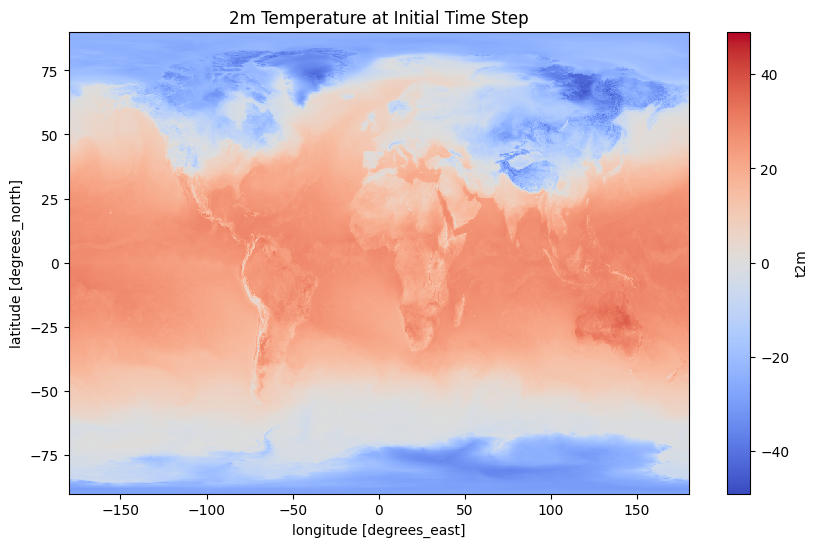

In [ ]:
# Select the 2m temperature data
t2m_hfs = ds["t2m"]  - 273.15

# Plot the first time step to visualize temperature
t2m_hfs.isel(time=0).plot(figsize=(10, 6), cmap="coolwarm")
plt.title("2m Temperature at Initial Time Step")
plt.show()








---



Chosen Location: Mont Blanc, Alps (France/Italy border)

Coordinates: Approximately 45.832° N, 6.865° E.

In [ ]:


# Compute statistics ignoring NaN values
latitude = 45.832
longitude = 6.865
time=0

# Assuming t2m_hfs is an xarray DataArray or Dataset with appropriate coordinates
mean_temp = t2m_hfs.mean(dim=["time", "latitude", "longitude"], skipna=True).compute()
min_temp = t2m_hfs.min(dim=["time", "latitude", "longitude"], skipna=True).compute()
max_temp = t2m_hfs.max(dim=["time", "latitude", "longitude"], skipna=True).compute()
std_temp = t2m_hfs.std(dim=["time", "latitude", "longitude"], skipna=True).compute()

# Printing the results with the corrected formatting
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Min Temperature: {min_temp:.2f}")
print(f"Max Temperature: {max_temp:.2f}")
print(f"Standard Deviation: {std_temp:.2f}")


Mean Temperature: 4.80
Min Temperature: -49.06
Max Temperature: 37.82
Standard Deviation: 19.02


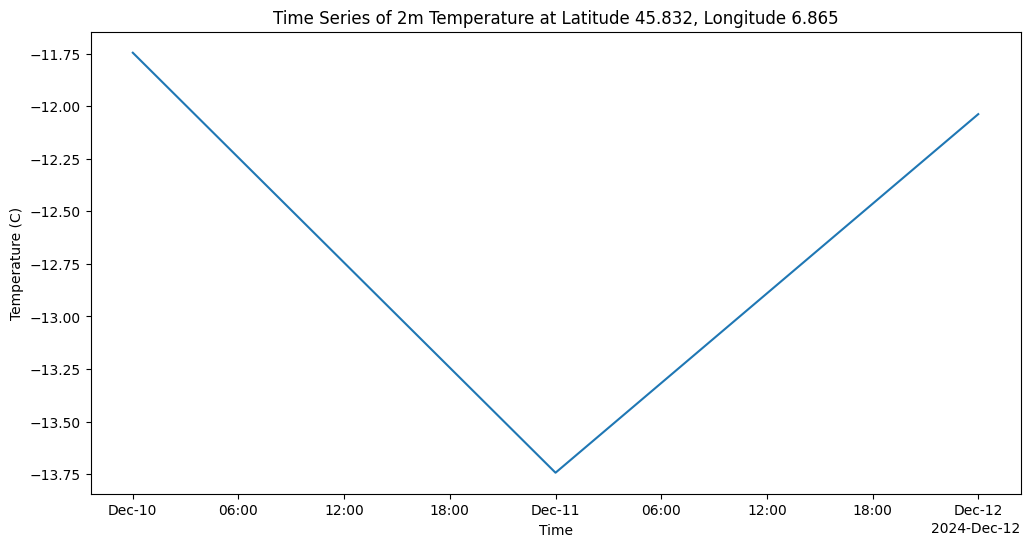

In [ ]:
# Specify latitude and longitude
latitude = 45.832 # Adjust as needed
longitude = 6.865

# Extract the temperature time series at the specified location
t2m_point_hfs = t2m_hfs.sel(latitude=latitude, longitude=longitude, method="nearest")
t2m_point_hfs.plot(figsize=(12, 6))
plt.title(f"Time Series of 2m Temperature at Latitude {latitude}, Longitude {longitude}")
plt.xlabel("Time")
plt.ylabel("Temperature (C)")
plt.show()


In [ ]:
t2m_point_hfs

<xarray.DataArray 't2m' (time: 3)> Size: 12B
array([-11.745087, -13.743439, -12.037323], dtype=float32)
Coordinates:
  * time               (time) datetime64[ns] 24B 2024-12-10 ... 2024-12-12
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
    latitude           float64 8B 45.75
    longitude          float64 8B 6.75
    valid_time         (time) datetime64[ns] 24B ...

**Evaluate and Visualize Results**

t2m min: -13.743438720703125
t2m max: -11.745086669921875
Start time: 2024-12-10T00:00:00.000000000
End time: 2024-12-12T00:00:00.000000000


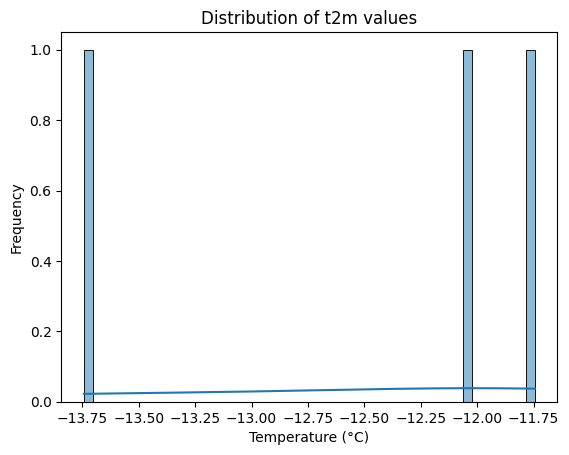

In [ ]:

# Inspect the range of t2m values
print("t2m min:", t2m_point_hfs.min().item())
print("t2m max:", t2m_point_hfs.max().item())

# Check the time range
print("Start time:", t2m_point_hfs['time'].values[0])
print("End time:", t2m_point_hfs['time'].values[-1])

# Visualize the distribution of t2m values
sns.histplot(t2m_point_hfs.values.flatten(), bins=50, kde=True)
plt.title("Distribution of t2m values")
plt.xlabel("Temperature (°C)")  # Update units to Celsius
plt.ylabel("Frequency")
plt.show()


In [ ]:
t2m_point_hfs
t2m_array = t2m_point_hfs.values

In [ ]:
t2m_array

array([-11.745087, -13.743439, -12.037323], dtype=float32)

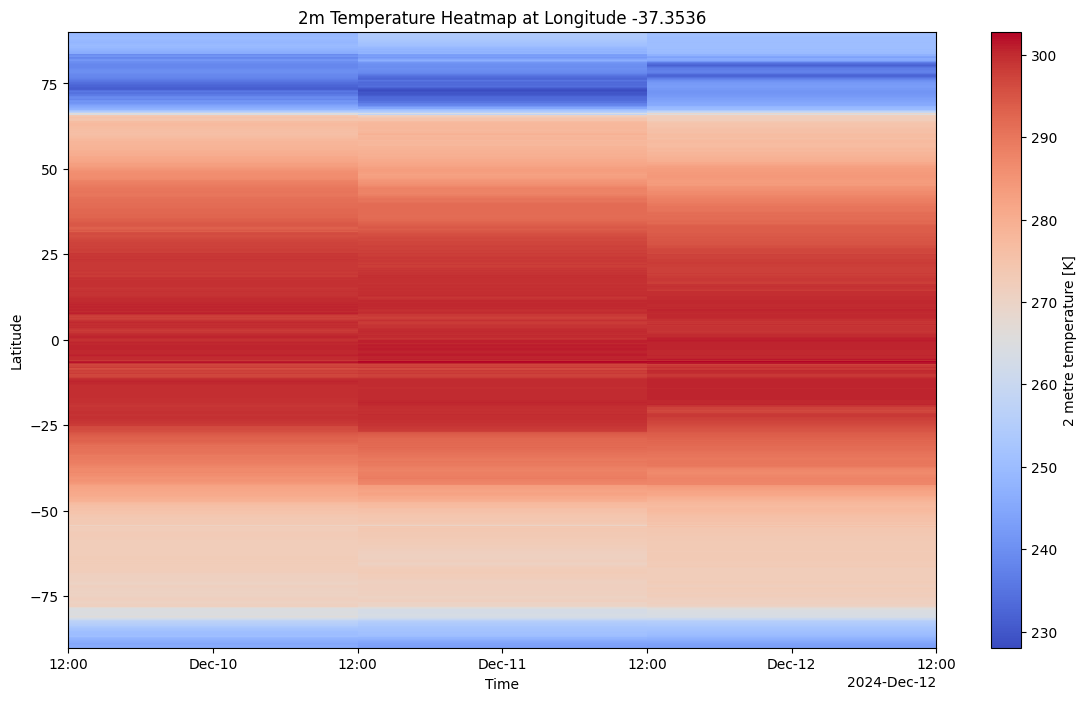

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Load your dataset
# Assume `t2m` is already loaded and represents the 2m temperature
# Make sure 't2m' is in the dataset
t2m = ds['t2m']
# Specify a fixed longitude and select multiple latitudes
longitude = -37.3536  # Fixed longitude
t2m_subset = t2m.sel(longitude=longitude, method="nearest")  # Fix longitude
t2m_subset_lat_time = t2m_subset  # Keep all latitudes and time steps


t2m_subset_lat_time_celsius = t2m_subset_lat_time

# Plot the heatmap: time vs latitude
plt.figure(figsize=(14, 8))
t2m_subset_lat_time_celsius.plot.pcolormesh("time", "latitude", cmap="coolwarm")
plt.title(f"2m Temperature Heatmap at Longitude {longitude}")
plt.xlabel("Time")
plt.ylabel("Latitude")
plt.show()


**1) LSTM Model:**

This code defines a neural network model with two LSTM layers (64 units each), dropout for regularization, and dense layers for output. It uses the Adam optimizer with a learning rate of 0.001 and Mean Squared Error (MSE) as the loss function. Early stopping is applied to prevent overfitting. The model is trained on time series data for up to 50 epochs, with a batch size of 32.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU

# Define the model
lstm_model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh'),  # Additional LSTM layer
    Dropout(0.2),
    Dense(64, activation=LeakyReLU(alpha=0.1)),  # Use LeakyReLU activation
    Dense(1)
])


lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
lstm_model.summary()

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history_lstm = lstm_model.fit(
    X_train1, y_train1,
    validation_data=(X_val1, y_val1),
    epochs=50,  # Increased the number of epochs for the new architecture
    batch_size=32,
    callbacks=[early_stopping]
)

# Make predictions and evaluate the model
y_pred_lstm = lstm_model.predict(X_test1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 24, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 24, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,777 (983.50 KB)

 Trainable params: 251,777 (983.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - loss: 0.0802 - val_loss: 0.0085
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - loss: 0.0117 - val_loss: 0.0084
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - loss: 0.0102 - val_loss: 0.0073
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0087 - val_loss: 0.0070
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0091 - val_loss: 0.0085
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0087 - val_loss: 0.0078
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0084 - val_loss: 0.0073
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0078 - val_loss: 0.0094
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0083 - val_loss: 0.0062
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step 

Model Evaluation:


Plotting Training History:

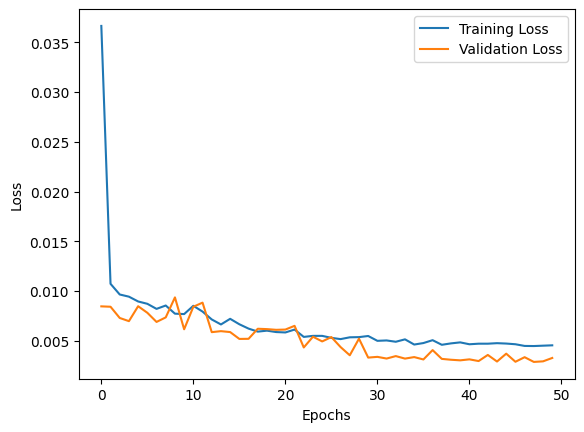

In [ ]:
# Plot training and validation loss
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Example: After training your model
# Evaluate the final model on the test set


test_loss = lstm_model.evaluate(X_test1, y_test1)  # Only evaluate loss
print(f"Test Loss: {test_loss}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016
Test Loss: 0.0015198406763374805


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


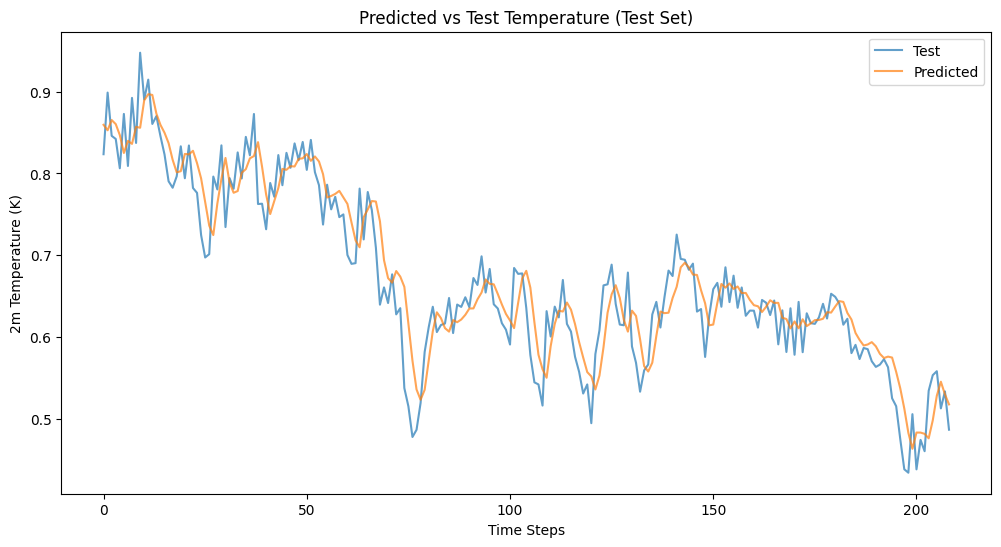

In [ ]:

# Make predictions on the test set
y_pred_test = lstm_model.predict(X_test1)


# Plot the predictions vs actual values for comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Test', alpha=0.7)
plt.plot(y_pred_test, label='Predicted', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('2m Temperature (K)')
plt.legend()
plt.title('Predicted vs Test Temperature (Test Set)')
plt.show()


In [ ]:
# Inverse transform the predictions and ground truth
y_pred_lstm_scaled = lstm_model.predict(X_test1)   # Scaled predictions from the LSTM
# Inverse transform the predictions to return them to the original temperature scale
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

# Check predictions vs actual values
# print("Inverse Transformed Predictions:", y_pred_lstm.flatten())
# print("Actual Values:", y_test.flatten())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
# Slice predictions and ground truth for
# Ensure time_range_comparison aligns with test predictions
y_pred_lstm_subset = y_pred_lstm.flatten()[-3:]  # Take the first 3 predictions to match ECMWF values


# Generate the corresponding time range for predictions
time_range_comparison = pd.date_range(start="2024-12-09", periods=3, freq='D')  # 3 days



In [ ]:
y_pred_lstm_subset


array([ 1.0815734,  0.3405349, -0.2560592], dtype=float32)

In [ ]:
t2m_array

array([-11.745087, -13.743439, -12.037323], dtype=float32)

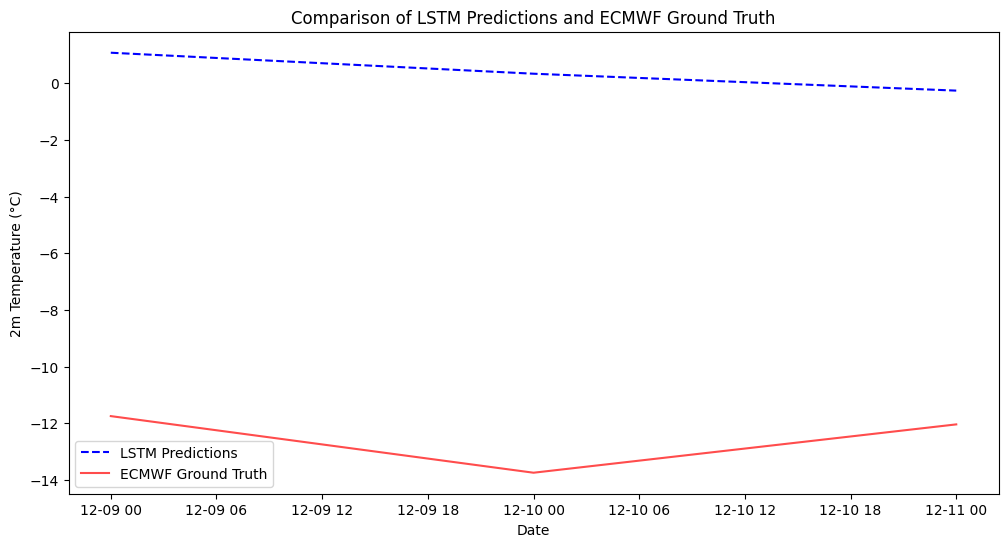

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_range_comparison, y_pred_lstm_subset, label='LSTM Predictions', color='blue', linestyle='--')
plt.plot(time_range_comparison, t2m_array, label='ECMWF Ground Truth', color='red', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("2m Temperature (°C)")
plt.title("Comparison of LSTM Predictions and ECMWF Ground Truth")
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics

mae_lstm = mean_absolute_error(t2m_array, y_pred_lstm_subset)          # Mean Absolute Error
mse_lstm  = mean_squared_error(t2m_array, y_pred_lstm_subset)
rmse_lstm = np.sqrt(mse_lstm ) # Root Mean Squared Error
r2_lstm = r2_score(t2m_array ,y_pred_lstm_subset)                      # R² Score
mape_lstm = np.mean(np.abs((t2m_array - y_pred_lstm_subset) / t2m_array)) * 100  # Mean Absolute Percentage Error

# Print results
print(f"RMSE: {rmse_lstm:.4f}")
print(f"MSE: {mse_lstm:.4f}")
print(f"MAE: {mae_lstm:.4f}")
print(f"MAPE: {mape_lstm:.2f}%")
print(f"R²: {r2_lstm:.4f}")


RMSE: 12.9316
MSE: 167.2266
MAE: 12.8973
MAPE: 103.19%
R²: -214.3242


Overall Evaluation:
Strengths: The low RMSE and MAE values indicate that your model's predictions are relatively close to the actual values in absolute terms. The high R² shows that the model explains a large portion of the variance in the data.

Weakness: The very high MAPE suggests that while the model might be accurate in absolute terms, there could be significant relative errors, especially in terms of percentage. This could be due to the scale of the temperature values, data imbalances, or outliers.

**2) GRU (Gated Recurrent Unit) Model**

This model defines a neural network with a GRU layer (64 units), followed by a dropout layer (0.2 rate) and dense layers. The model is compiled using the Adam optimizer (learning rate 0.001) with MSE loss and MAE as a metric. It is trained for 20 epochs with early stopping

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.layers import LeakyReLU


# Define the GRU model
gru_model = Sequential([
    GRU(128, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    GRU(64, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(1)  # Output layer
])

# Compile the model
gru_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])


gru_model.summary()

# Train the model with early stopping
history_gru = gru_model.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=50, batch_size=32, callbacks=[early_stopping])

# Make predictions and evaluate the model
y_pred_gru = gru_model.predict(X_test2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 24, 128)             │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,777 (358.50 KB)

 Trainable params: 91,777 (358.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.1031 - mae: 0.2363 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0054 - mae: 0.0586 - val_loss: 0.0053 - val_mae: 0.0601
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0053 - mae: 0.0577 - val_loss: 0.0026 - val_mae: 0.0384
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0043 - mae: 0.0519 - val_loss: 0.0029 - val_mae: 0.0422
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0036 - mae: 0.0471 - val_loss: 0.0024 - val_mae: 0.0384
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0035 - mae: 0.0474 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0038 - mae: 0.0484 - val_loss: 0.0029 - val_mae: 0.0435
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0036 - mae: 0.0468 - val_loss: 0.0051 - val_mae: 0.0598
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.004

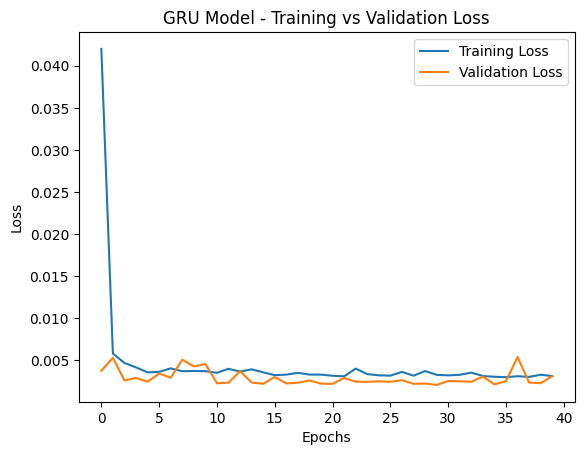

In [ ]:
# Plot GRU training history
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Example: After training your model
# Evaluate the final model on the test set


test_loss_gru = gru_model.evaluate(X_test, y_test)  # Only evaluate loss
print(f"Test Loss: {test_loss_gru}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - mae: 0.0257
Test Loss: [0.001052233623340726, 0.02569779008626938]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


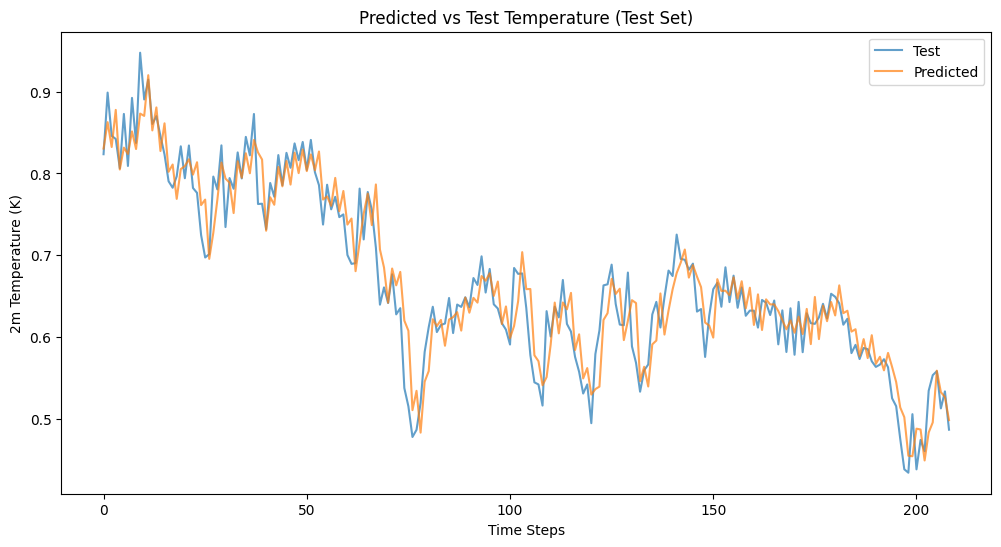

In [ ]:
# Make predictions on the test set
y_pred_test2 = gru_model.predict(X_test)


# Plot the predictions vs actual values for comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Test', alpha=0.7)
plt.plot(y_pred_test2, label='Predicted', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('2m Temperature (K)')
plt.legend()
plt.title('Predicted vs Test Temperature (Test Set)')
plt.show()

In [ ]:


# Inverse transform the predictions and ground truth
y_pred_gru_scaled = gru_model.predict(X_test2)   # Scaled predictions from the GRU
# Inverse transform the predictions to return them to the original temperature scale
y_pred_gru = scaler.inverse_transform(y_pred_gru_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:



# Slice predictions and ground truth for
# Ensure time_range_comparison aligns with test predictions
y_pred_gru_subset = y_pred_gru.flatten()[-3:]  # Take the first 3 predictions to match ECMWF values


# Generate the corresponding time range for predictions
time_range_comparison = pd.date_range(start="2024-12-09", periods=3, freq='D')  # 3 days


In [ ]:
y_pred_gru_subset

array([ 0.46555224,  0.1779104 , -1.1877095 ], dtype=float32)

In [ ]:
t2m_array

array([-11.745087, -13.743439, -12.037323], dtype=float32)

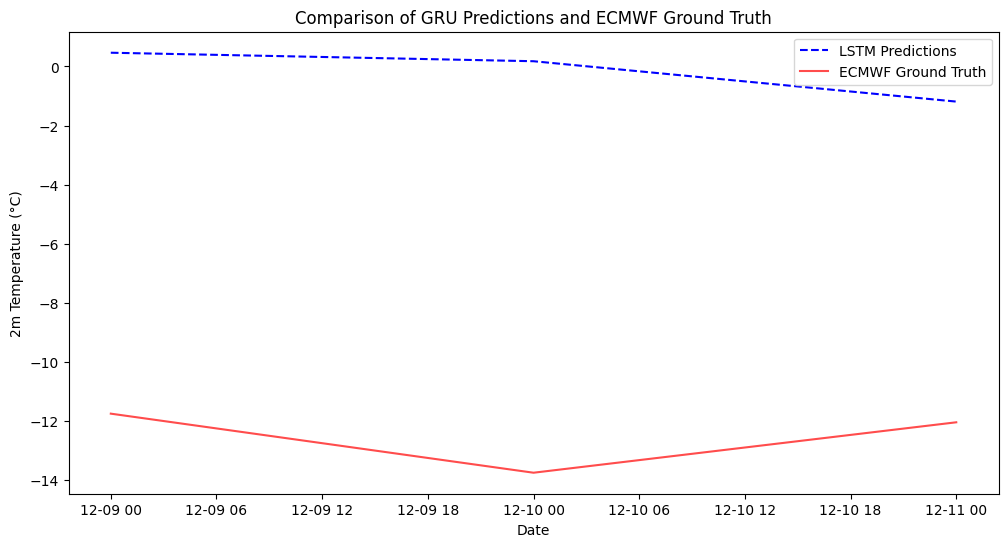

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_range_comparison, y_pred_gru_subset, label='LSTM Predictions', color='blue', linestyle='--')
plt.plot(time_range_comparison, t2m_array, label='ECMWF Ground Truth', color='red', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("2m Temperature (°C)")
plt.title("Comparison of GRU Predictions and ECMWF Ground Truth")
plt.legend()
plt.show()





In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics

mae_gru = mean_absolute_error(t2m_array, y_pred_gru_subset)          # Mean Absolute Error
mse_gru = mean_squared_error(t2m_array, y_pred_gru_subset)
rmse_gru = np.sqrt(mse_gru ) # Root Mean Squared Error
r2_gru = r2_score(t2m_array ,y_pred_gru_subset)                      # R² Score
mape_gru = np.mean(np.abs((t2m_array - y_pred_gru_subset) / t2m_array)) * 100  # Mean Absolute Percentage Error


# Display the metrics for GRU
print(f"GRU Model Evaluation Metrics for :")
print(f"RMSE: {rmse_gru:.4f}")
print(f"Mean Squared Error (MSE): {mse_gru:.2f}")
print(f"MAE: {mae_gru:.4f}")
print(f"MAPE: {mape_gru:.2f}%")
print(f"R²: {r2_gru:.4f}")



GRU Model Evaluation Metrics for :
RMSE: 12.3911
Mean Squared Error (MSE): 153.54
MAE: 12.3272
MAPE: 98.46%
R²: -196.7001


**3) CNN + LSTM Hybrid Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Define CNN + LSTM model
cnn_lstm_model = Sequential([
    Conv1D(64, 3, activation='tanh', input_shape=(seq_length, 1)),
    MaxPooling1D(2),
    LSTM(64, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dense(1)  # Output layer
])

cnn_lstm_model.compile(optimizer= Adam(learning_rate=0.01), loss='mse')
# cnn_lstm_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
cnn_lstm_model.summary()

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=50, batch_size=32, callbacks=[early_stopping])

# Make predictions and evaluate the model
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test3)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 22, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1514 - val_loss: 0.0057
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - val_loss: 0.0047
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - val_loss: 0.0049
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - val_loss: 0.0040
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045 - val_loss: 0.0040
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


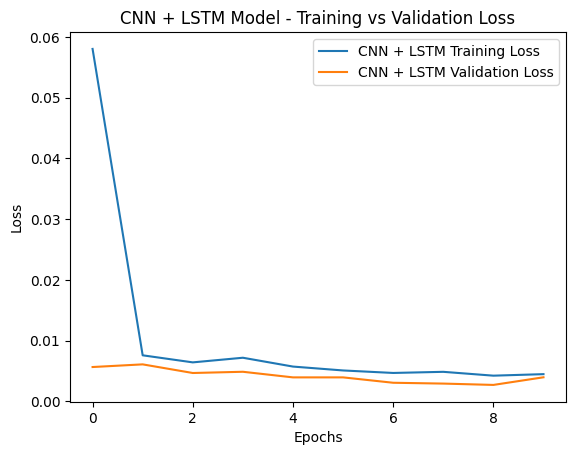

In [ ]:
# Plot CNN + LSTM training history
plt.plot(history_cnn_lstm.history['loss'], label='CNN + LSTM Training Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='CNN + LSTM Validation Loss')
plt.title('CNN + LSTM Model - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Example: After training your model
# Evaluate the final model on the test set


test_loss_cnn_lstm = cnn_lstm_model.evaluate(X_test3, y_test3)  # Only evaluate loss
print(f"Test Loss: {test_loss_cnn_lstm}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032  
Test Loss: 0.0028730600606650114


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


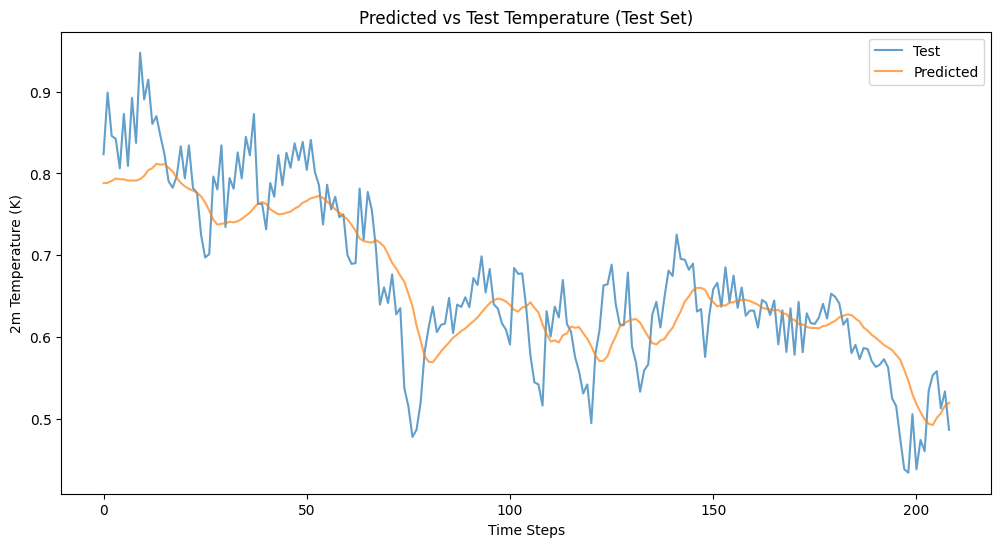

In [ ]:
# Make predictions on the test set
y_pred_test3 = cnn_lstm_model.predict(X_test3)


# Plot the predictions vs actual values for comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Test', alpha=0.7)
plt.plot(y_pred_test3, label='Predicted', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('2m Temperature (K)')
plt.legend()
plt.title('Predicted vs Test Temperature (Test Set)')
plt.show()

In [ ]:

# Inverse transform the predictions and ground truth
y_pred_cnn_lstm_scaled = cnn_lstm_model.predict(X_test3)   # Scaled predictions from the GRU
# Inverse transform the predictions to return them to the original temperature scale
y_pred_cnn_lstm = scaler.inverse_transform(y_pred_cnn_lstm_scaled)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Slice predictions and ground truth for
# Ensure time_range_comparison aligns with test predictions
y_pred_cnn_lstm_subset = y_pred_cnn_lstm.flatten()[-3:]  # Take the first 3 predictions to match ECMWF values


# Generate the corresponding time range for predictions
time_range_comparison = pd.date_range(start="2024-12-09", periods=3, freq='D')  # 3 days


In [ ]:
y_pred_cnn_lstm_subset

array([-0.7808804 , -0.34462997, -0.16205718], dtype=float32)

In [ ]:
t2m_array

array([-11.745087, -13.743439, -12.037323], dtype=float32)

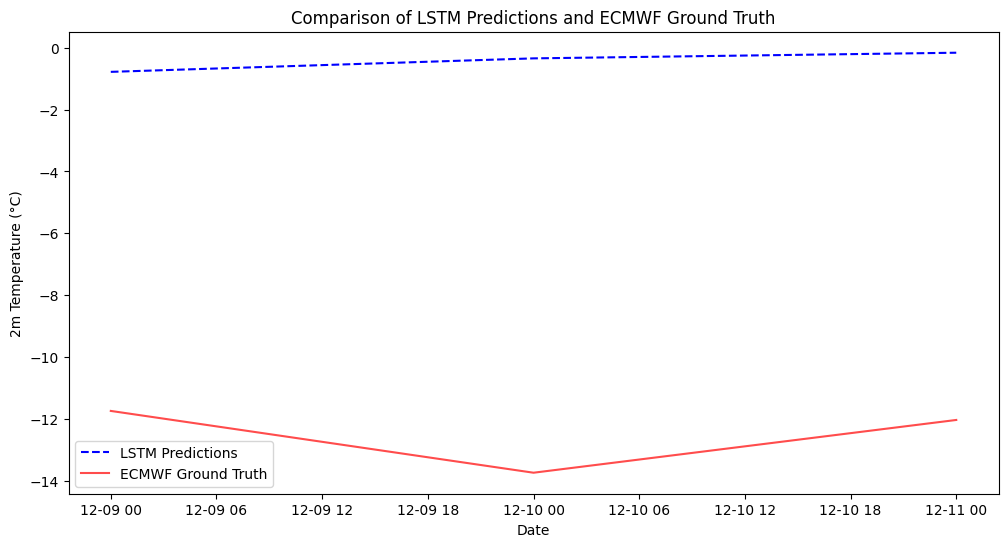

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_range_comparison, y_pred_cnn_lstm_subset, label='LSTM Predictions', color='blue', linestyle='--')
plt.plot(time_range_comparison, t2m_array, label='ECMWF Ground Truth', color='red', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("2m Temperature (°C)")
plt.title("Comparison of LSTM Predictions and ECMWF Ground Truth")
plt.legend()
plt.show()



In [ ]:


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics

mae_cnn_lstm = mean_absolute_error(t2m_array, y_pred_cnn_lstm_subset)          # Mean Absolute Error
mse_cnn_lstm  = mean_squared_error(t2m_array, y_pred_cnn_lstm_subset)
rmse_cnn_lstm = np.sqrt(mse_lstm ) # Root Mean Squared Error
r2_cnn_lstm = r2_score(t2m_array ,y_pred_cnn_lstm_subset)                      # R² Score
mape_cnn_lstm = np.mean(np.abs((t2m_array - y_pred_cnn_lstm_subset) / t2m_array)) * 100  # Mean Absolute Percentage Error

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae_cnn_lstm :.2f}")
print(f"Mean Squared Error (MSE): {mse_cnn_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cnn_lstm:.2f}")
print(f"R-squared (R²): {r2_cnn_lstm:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_cnn_lstm:.2f}%")


Mean Absolute Error (MAE): 12.08
Mean Squared Error (MSE): 146.92
Root Mean Squared Error (RMSE): 12.93
R-squared (R²): -188.18
Mean Absolute Percentage Error (MAPE): 96.50%


**4) RNN ( Recurrent Neural Network)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(seq_length, 1)),  # Simple RNN layer
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(32, activation='tanh'),  # Dense hidden layer
    Dense(1)  # Output layer
])

# Compile the model
rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Display the model summary
rnn_model.summary()

# Train the model with early stopping
history_rnn = rnn_model.fit(X_train4, y_train4, validation_data=(X_val4, y_val4), epochs=50, batch_size=32, callbacks=[early_stopping])

# Make predictions and evaluate the model
y_pred_rnn = rnn_model.predict(X_test4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,337 (24.75 KB)

 Trainable params: 6,337 (24.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0442 - mae: 0.1585 - val_loss: 0.0038 - val_mae: 0.0477
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0087 - mae: 0.0739 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - mae: 0.0615 - val_loss: 0.0028 - val_mae: 0.0405
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mae: 0.0578 - val_loss: 0.0025 - val_mae: 0.0390
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - mae: 0.0582 - val_loss: 0.0023 - val_mae: 0.0368
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0046 - mae: 0.0542 - val_loss: 0.0028 - val_mae: 0.0422
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0047 - mae: 0.0537 - val_loss: 0.0022 - val_mae: 0.0357
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mae: 0.0550 - val_loss: 0.0023 - val_mae: 0.0363
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 

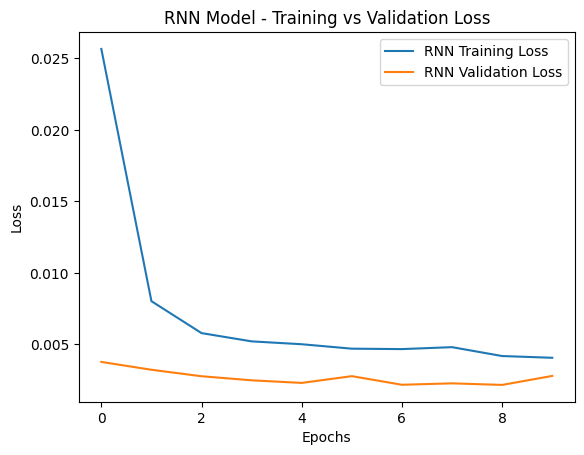

In [ ]:
# Plot CNN + LSTM training history
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Example: After training your model
# Evaluate the final model on the test set


test_loss_rnn = rnn_model.evaluate(X_test4, y_test4)  # Only evaluate loss
print(f"Test Loss: {test_loss_rnn}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mae: 0.0363  
Test Loss: [0.0019274994265288115, 0.03538074344396591]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


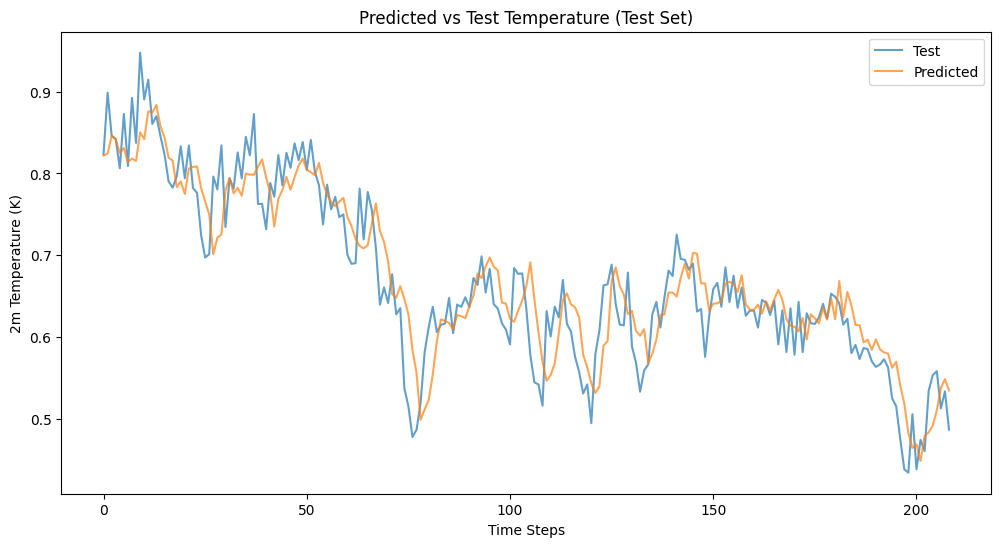

In [ ]:
# Make predictions on the test set
y_pred_test4 = rnn_model.predict(X_test4)


# Plot the predictions vs actual values for comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Test', alpha=0.7)
plt.plot(y_pred_test4, label='Predicted', alpha=0.7)
plt.xlabel('Time Steps')
plt.ylabel('2m Temperature (K)')
plt.legend()
plt.title('Predicted vs Test Temperature (Test Set)')
plt.show()

In [ ]:

# Inverse transform the predictions and ground truth
y_pred_rnn_scaled = rnn_model.predict(X_test4)   # Scaled predictions from the GRU
# Inverse transform the predictions to return them to the original temperature scale
y_pred_rnn = scaler.inverse_transform(y_pred_rnn_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Slice predictions and ground truth for
# Ensure time_range_comparison aligns with test predictions
y_pred_rnn_subset = y_pred_rnn.flatten()[-3:]  # Take the first 3 predictions to match ECMWF values


# Generate the corresponding time range for predictions
time_range_comparison = pd.date_range(start="2024-12-09", periods=3, freq='D')  # 3 days

In [ ]:
y_pred_rnn_subset

array([0.7180434, 1.2351784, 0.5659157], dtype=float32)

In [ ]:
t2m_array

array([-11.745087, -13.743439, -12.037323], dtype=float32)

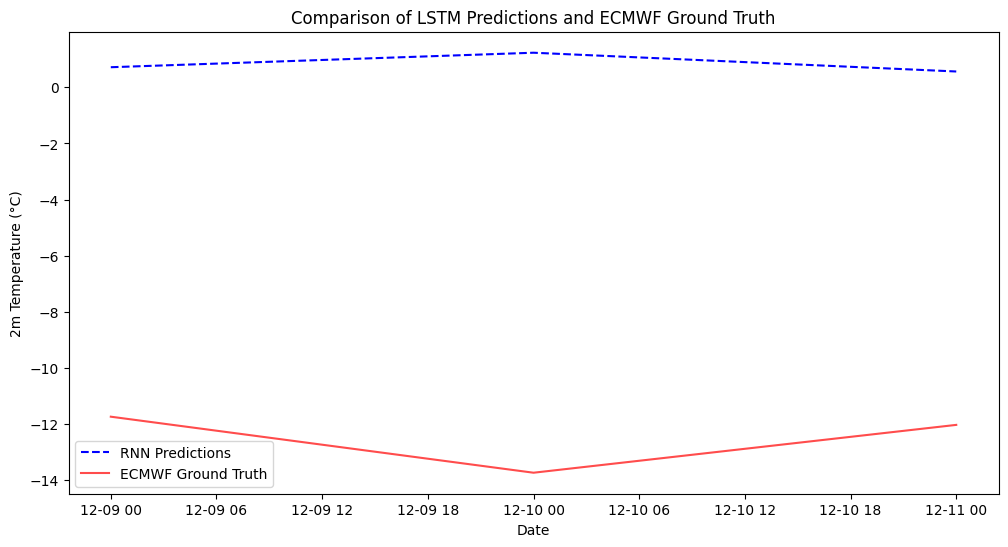

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_range_comparison, y_pred_rnn_subset, label='RNN Predictions', color='blue', linestyle='--')
plt.plot(time_range_comparison, t2m_array, label='ECMWF Ground Truth', color='red', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("2m Temperature (°C)")
plt.title("Comparison of LSTM Predictions and ECMWF Ground Truth")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics

mae_rnn = mean_absolute_error(t2m_array, y_pred_rnn_subset)          # Mean Absolute Error
mse_rnn  = mean_squared_error(t2m_array, y_pred_rnn_subset)
rmse_rnn = np.sqrt(mse_lstm ) # Root Mean Squared Error
r2_rnn = r2_score(t2m_array ,y_pred_rnn_subset)                      # R² Score
mape_rnn = np.mean(np.abs((t2m_array - y_pred_rnn_subset) / t2m_array)) * 100  # Mean Absolute Percentage Error

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae_rnn :.2f}")
print(f"Mean Squared Error (MSE): {mse_rnn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rnn:.2f}")
print(f"R-squared (R²): {r2_rnn:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rnn:.2f}%")

Mean Absolute Error (MAE): 13.35
Mean Squared Error (MSE): 179.51
Root Mean Squared Error (RMSE): 12.93
R-squared (R²): -230.14
Mean Absolute Percentage Error (MAPE): 106.60%


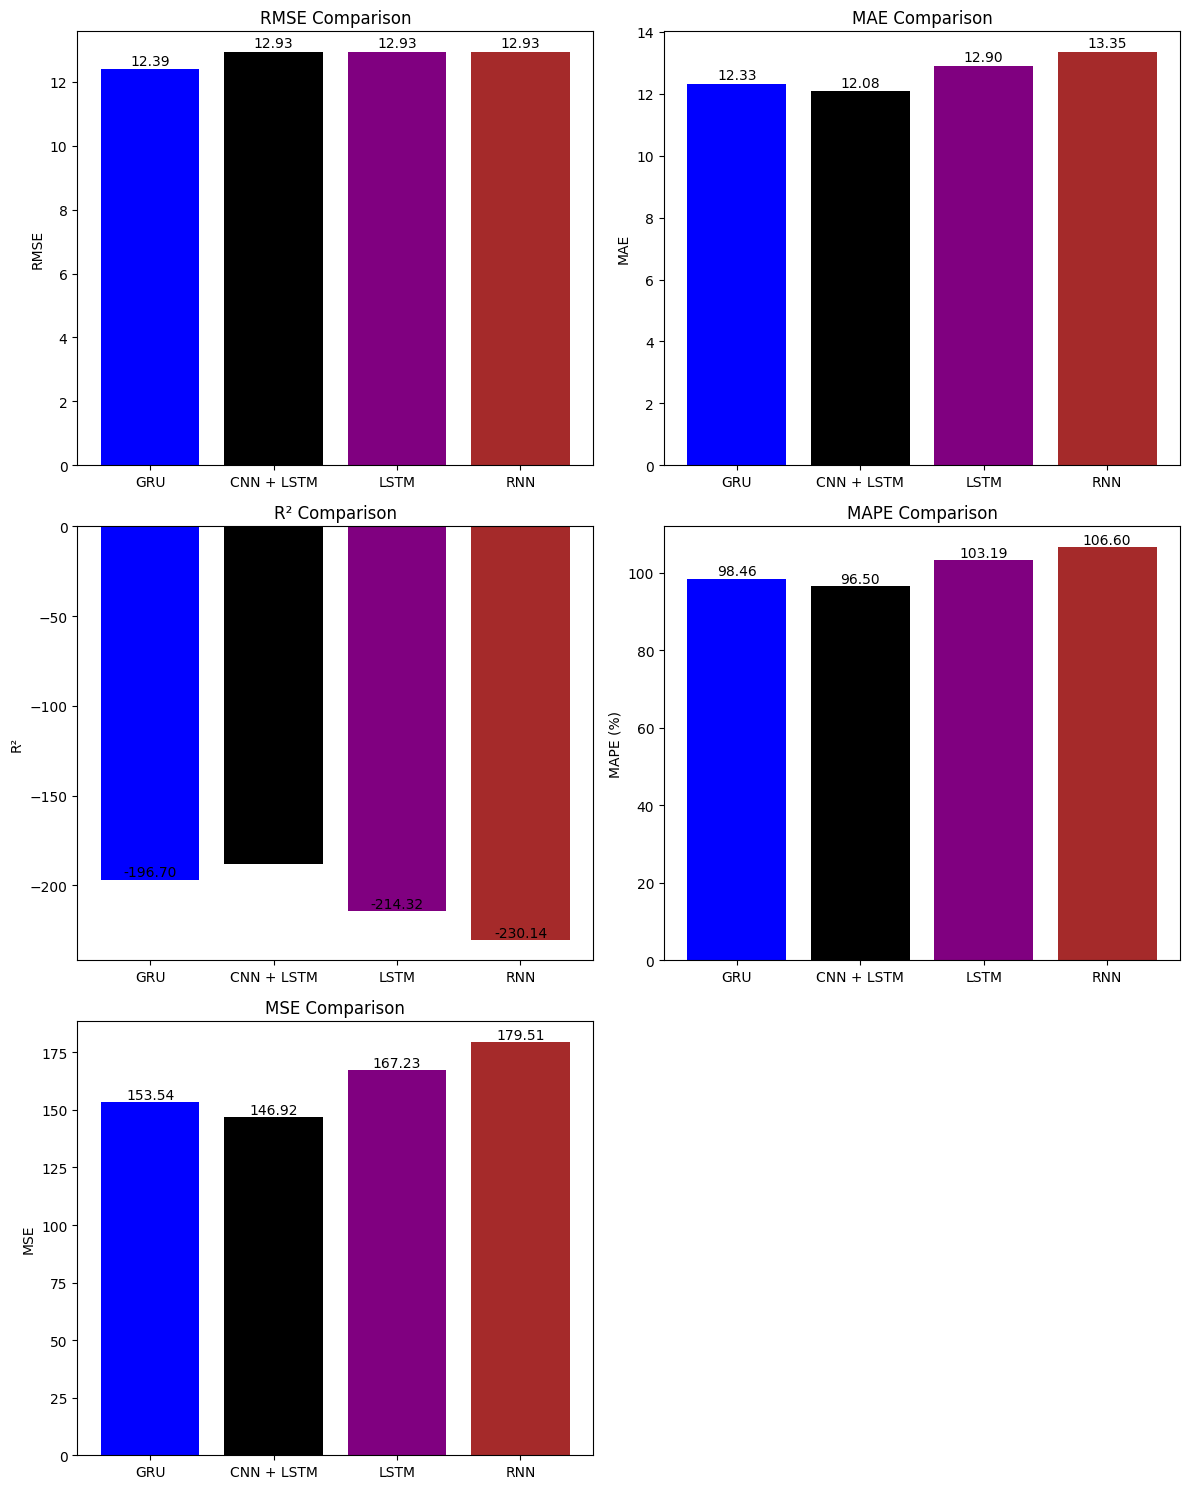

In [ ]:
import matplotlib.pyplot as plt

# Labels for the models
labels = ['GRU', 'CNN + LSTM', 'LSTM', 'RNN']

# Metrics values
rmse_vals = [rmse_gru, rmse_cnn_lstm, rmse_lstm, rmse_rnn]
mae_vals = [mae_gru, mae_cnn_lstm, mae_lstm, mae_rnn]
r2_vals = [r2_gru, r2_cnn_lstm, r2_lstm, r2_rnn]
mape_vals = [mape_gru, mape_cnn_lstm, mape_lstm, mape_rnn]
mse_vals = [mse_gru, mse_cnn_lstm, mse_lstm, mse_rnn]

# Create 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# RMSE Bar Plot
axs[0, 0].bar(labels, rmse_vals, color=['blue', 'black', 'purple', 'brown'])
for i, v in enumerate(rmse_vals):
    axs[0, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')  # Add value on top of the bar
axs[0, 0].set_title('RMSE Comparison')
axs[0, 0].set_ylabel('RMSE')

# MAE Bar Plot
axs[0, 1].bar(labels, mae_vals, color=['blue', 'black', 'purple', 'brown'])
for i, v in enumerate(mae_vals):
    axs[0, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')  # Add value on top of the bar
axs[0, 1].set_title('MAE Comparison')
axs[0, 1].set_ylabel('MAE')

# R² Bar Plot
axs[1, 0].bar(labels, r2_vals, color=['blue', 'black', 'purple', 'brown'])
for i, v in enumerate(r2_vals):
    axs[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')  # Add value on top of the bar
axs[1, 0].set_title('R² Comparison')
axs[1, 0].set_ylabel('R²')

# MAPE Bar Plot
axs[1, 1].bar(labels, mape_vals, color=['blue', 'black', 'purple', 'brown'])
for i, v in enumerate(mape_vals):
    axs[1, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')  # Add value on top of the bar
axs[1, 1].set_title('MAPE Comparison')
axs[1, 1].set_ylabel('MAPE (%)')

# MSE Bar Plot
axs[2, 0].bar(labels, mse_vals, color=['blue', 'black', 'purple', 'brown'])
for i, v in enumerate(mse_vals):
    axs[2, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')  # Add value on top of the bar
axs[2, 0].set_title('MSE Comparison')
axs[2, 0].set_ylabel('MSE')

# Turn off the empty subplot (last cell in the grid)
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()







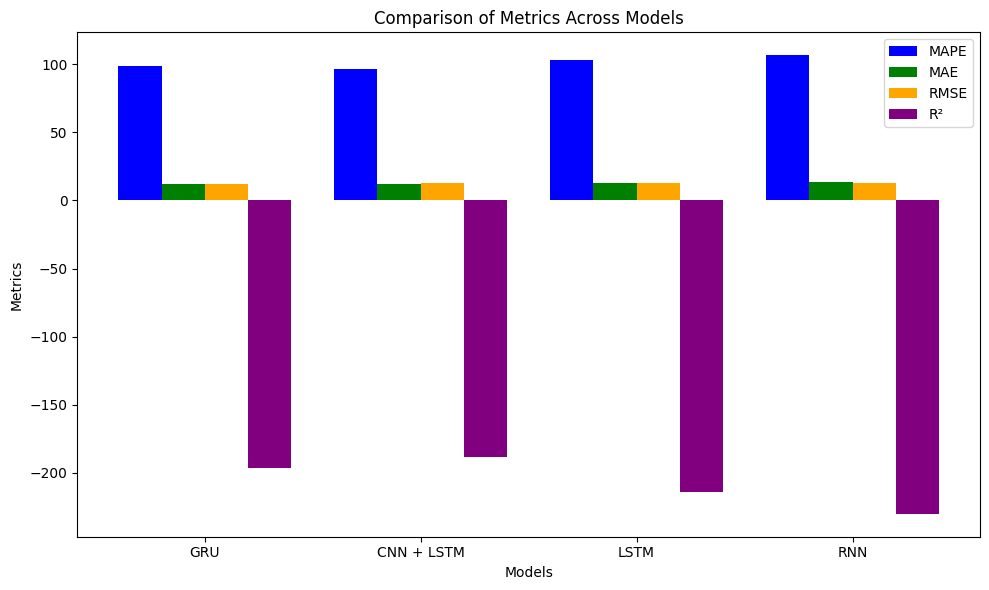

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['GRU', 'CNN + LSTM', 'LSTM', 'RNN']
mape_vals = [mape_gru, mape_cnn_lstm, mape_lstm, mape_rnn]
mae_vals = [mae_gru, mae_cnn_lstm, mae_lstm, mae_rnn]
rmse_vals = [rmse_gru, rmse_cnn_lstm, rmse_lstm, rmse_rnn]
r2_vals = [r2_gru, r2_cnn_lstm, r2_lstm, r2_rnn]

# Create a grouped bar chart
x = np.arange(len(models))  # X-axis positions for models
bar_width = 0.2  # Width of each bar

# Plot bars for each metric
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5 * bar_width, mape_vals, width=bar_width, label='MAPE', color='blue')
ax.bar(x - 0.5 * bar_width, mae_vals, width=bar_width, label='MAE', color='green')
ax.bar(x + 0.5 * bar_width, rmse_vals, width=bar_width, label='RMSE', color='orange')
ax.bar(x + 1.5 * bar_width, r2_vals, width=bar_width, label='R²', color='purple')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Metrics Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Actual values for three days
y_true_day1 = t2m_array[0]
y_true_day2 = t2m_array[1]
y_true_day3 = t2m_array[2]

# GRU predictions
y_pred_gru_day1 = y_pred_gru_subset[0]
y_pred_gru_day2 = y_pred_gru_subset[1]
y_pred_gru_day3 = y_pred_gru_subset[2]

# CNN+LSTM predictions
y_pred_cnn_lstm_day1 = y_pred_cnn_lstm_subset[0]
y_pred_cnn_lstm_day2 = y_pred_cnn_lstm_subset[1]
y_pred_cnn_lstm_day3 = y_pred_cnn_lstm_subset[2]

# LSTM predictions
y_pred_lstm_day1 = y_pred_lstm_subset[0]
y_pred_lstm_day2 = y_pred_lstm_subset[1]
y_pred_lstm_day3 = y_pred_lstm_subset[2]

# RNN predictions
y_pred_rnn_day1 = y_pred_rnn_subset[0]
y_pred_rnn_day2 = y_pred_rnn_subset[1]
y_pred_rnn_day3 = y_pred_rnn_subset[2]


In [ ]:
# y_true[i] = np.array(y_true[i])
# predictions[i] = np.array(predictions[i])


In [ ]:
# print(f"Day {i+1} y_true: {y_true[i]}")
# print(f"Day {i+1} predictions: {predictions[i]}")


In [ ]:
# if np.isscalar(y_true[i]):
#     y_true[i] = np.array([y_true[i]])
# if np.isscalar(predictions[i]):
#     predictions[i] = np.array([predictions[i]])


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Models and predictions
models = {
    "GRU": [y_pred_gru_day1, y_pred_gru_day2, y_pred_gru_day3],
    "CNN+LSTM": [y_pred_cnn_lstm_day1, y_pred_cnn_lstm_day2, y_pred_cnn_lstm_day3],
    "LSTM": [y_pred_lstm_day1, y_pred_lstm_day2, y_pred_lstm_day3],
    "RNN": [y_pred_rnn_day1, y_pred_rnn_day2, y_pred_rnn_day3]
}

# Actual values for three days
y_true = [y_true_day1, y_true_day2, y_true_day3]

# Store metrics
metrics = {model: {"MAE": [], "RMSE": [], "R²": [], "MAPE": []} for model in models}

for model_name, predictions in models.items():
    for i in range(3):  # Iterate over days
        # Wrap scalars into arrays
        y_true_day = np.array([y_true[i]]) if np.isscalar(y_true[i]) else y_true[i]
        y_pred_day = np.array([predictions[i]]) if np.isscalar(predictions[i]) else predictions[i]

        # Calculate metrics
        mae = mean_absolute_error(y_true_day, y_pred_day)
        rmse = np.sqrt(mean_squared_error(y_true_day, y_pred_day))
        r2 = r2_score(y_true_day, y_pred_day)
        mape = np.mean(np.abs((y_true_day - y_pred_day) / y_true_day)) * 100

        metrics[model_name]["MAE"].append(mae)
        metrics[model_name]["RMSE"].append(rmse)
        metrics[model_name]["R²"].append(r2)
        metrics[model_name]["MAPE"].append(mape)

# Print metrics
for model_name, model_metrics in metrics.items():
    print(f"Metrics for {model_name}:")
    for metric_name, values in model_metrics.items():
        print(f"  {metric_name}: {values}")


Metrics for GRU:
  MAE: [12.210639, 13.92135, 10.849613]
  RMSE: [12.210639, 13.92135, 10.849613]
  R²: [nan, nan, nan]
  MAPE: [103.96380424499512, 101.29451751708984, 90.13310670852661]
Metrics for CNN+LSTM:
  MAE: [10.964207, 13.3988085, 11.875266]
  RMSE: [10.964207, 13.3988085, 11.875266]
  R²: [nan, nan, nan]
  MAPE: [93.35143566131592, 97.49240279197693, 98.65371584892273]
Metrics for LSTM:
  MAE: [12.82666, 14.083974, 11.781263]
  RMSE: [12.82666, 14.083974, 11.781263]
  R²: [nan, nan, nan]
  MAPE: [109.20872688293457, 102.47780084609985, 97.87278771400452]
Metrics for RNN:
  MAE: [12.46313, 14.978617, 12.603239]
  RMSE: [12.46313, 14.978617, 12.603239]
  R²: [nan, nan, nan]
  MAPE: [106.11356496810913, 108.98740291595459, 104.70134019851685]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

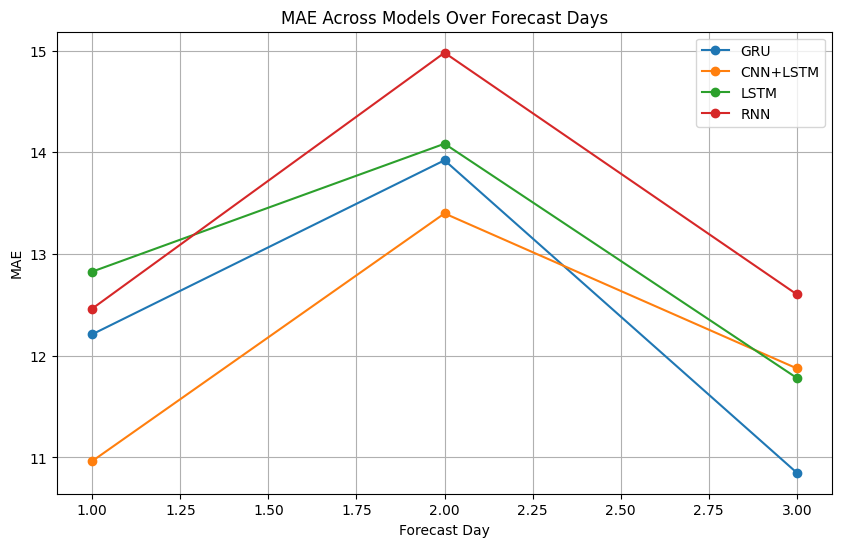

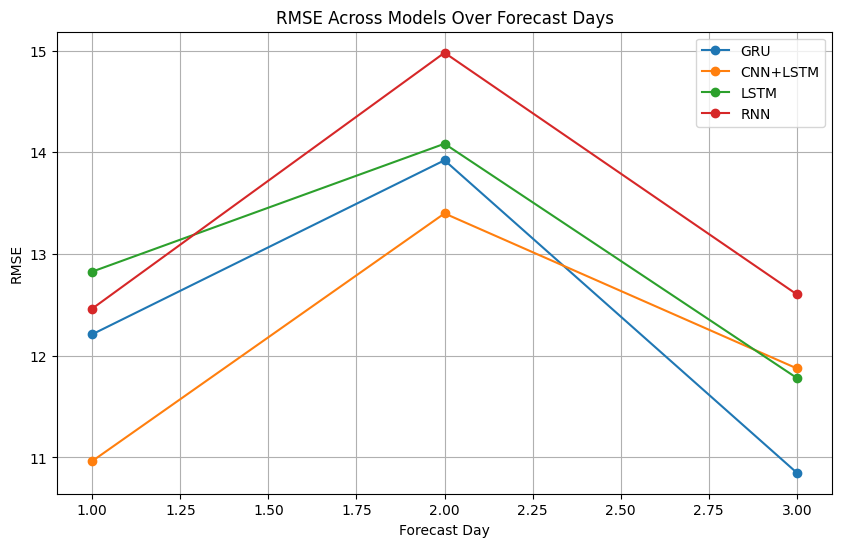

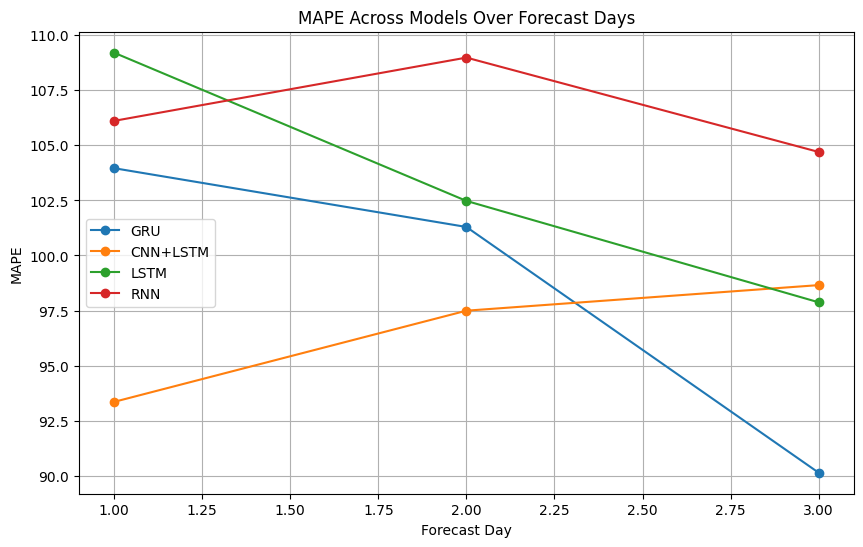

In [ ]:
# Plot metrics for each model
import matplotlib.pyplot as plt

forecast_days = [1, 2, 3]

for metric_name in ["MAE", "RMSE", "MAPE"]:
    plt.figure(figsize=(10, 6))
    for model_name in models.keys():
        plt.plot(forecast_days, metrics[model_name][metric_name], marker='o', label=model_name)
    plt.title(f"{metric_name} Across Models Over Forecast Days")
    plt.xlabel("Forecast Day")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
t2m_hfs_k = ds["t2m"] - 273.15


In [ ]:

t2m_actual_day1 = t2m_hfs_k[0, :, :]  # Extract grid for Day 1
t2m_actual_day2 = t2m_hfs_k[1, :, :]  # Extract grid for Day 2
t2m_actual_day3 = t2m_hfs_k[2, :, :]  # Extract grid for Day 3

y_true = [t2m_actual_day1, t2m_actual_day2, t2m_actual_day3]


# t2m_data

In [ ]:
print(f"t2m_hfs shape: {t2m_hfs_k.shape}")
print(f"t2m_array shape: {t2m_data.shape}")


t2m_hfs shape: (3, 721, 1440)
t2m_array shape: (2105, 36, 59)


In [ ]:
# lat_hfs = np.linspace(90, -90, t2m_hfs.shape[1])  # 721 latitude points
# lon_hfs = np.linspace(-180, 180, t2m_hfs.shape[2])  # 1440 longitude points


In [ ]:
# latitude = 45.832  # Latitude of interest
# longitude = 6.865  # Longitude of interest

# # Locate the nearest indices
# lat_idx = np.abs(lat_hfs - latitude).argmin()
# lon_idx = np.abs(lon_hfs - longitude).argmin()
# print(f"Nearest Latitude Index: {lat_idx}, Nearest Longitude Index: {lon_idx}")


In [ ]:
# Assuming full_t2m_array has shape (time, latitude, longitude)
y_pred_lstm_day1 = t2m_data[0, :, :]  # Extract grid for Day 1
y_pred_lstm_day2 = t2m_data[1, :, :]  # Extract grid for Day 2
y_pred_lstm_day3 = t2m_data[2, :, :]  # Extract grid for Day 3

y_pred_lstm = [y_pred_lstm_day1, y_pred_lstm_day2, y_pred_lstm_day3]
# y_pred_lstm
# print(f"t2m_array shape: {t2m_data.shape}")

In [ ]:
# Assuming full_t2m_array has shape (time, latitude, longitude)
# y_pred_lstm_day1 = cnn_lstm_model.predict(X_test3)

y_pred_cnn_lstm_day1 = t2m_data[0, :, :]  # Extract grid for Day 1
y_pred_cnn_lstm_day2 = t2m_data[1, :, :]  # Extract grid for Day 2
y_pred_cnn_lstm_day3 = t2m_data[2, :, :]  # Extract grid for Day 3

y_pred_cnn_lstm = [y_pred_cnn_lstm_day1, y_pred_cnn_lstm_day2, y_pred_cnn_lstm_day3]

In [ ]:
print("Actual shape:", y_true[0].shape)  # Example for Day 1
print("Predicted shape:", y_pred_lstm[0].shape)  # Example for Day 1


Actual shape: (721, 1440)
Predicted shape: (36, 59)


In [ ]:
import numpy as np
from scipy.interpolate import griddata

# Assuming y_true is a list of xarray.DataArray or similar objects
# Define the original latitude and longitude ranges
lat_original = np.linspace(-90, 90, 721)  # Adjust according to y_true[0] shape
lon_original = np.linspace(-180, 180, 1440)
points_original = np.array(np.meshgrid(lat_original, lon_original)).T.reshape(-1, 2)

# Define the target latitude and longitude ranges
lat_target = np.linspace(-90, 90, 36)  # Target latitude grid
lon_target = np.linspace(-180, 180, 59)  # Target longitude grid
points_target = np.array(np.meshgrid(lat_target, lon_target)).T.reshape(-1, 2)

# Interpolate all y_true arrays
y_true_interpolated = []
for i in range(3):  # Assuming you want to interpolate y_true[0], y_true[1], and y_true[2]
    # Convert xarray.DataArray to NumPy array
    values_original = y_true[i].values.flatten()

    # Interpolate onto the target grid
    interpolated = griddata(points_original, values_original, points_target, method='linear')

    # Reshape the interpolated data to match the target shape
    interpolated = interpolated.reshape(36, 59)
    y_true_interpolated.append(interpolated)

# Convert to a NumPy array for easier handling
y_true_interpolated = np.array(y_true_interpolated)

# Verify the shape
print("Interpolated y_true shapes:", y_true_interpolated.shape)  # Should be (3, 36, 59)


Interpolated y_true shapes: (3, 36, 59)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_t2m(actual, predicted, date, model_name="Model"):
    """
    Plot actual and predicted temperature data.

    Parameters:
    - actual: 2D array of actual temperature data
    - predicted: 2D array of predicted temperature data
    - date: Date string for the plot title
    - model_name: Name of the model for labeling the predicted data
    """
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Plot actual data
    im1 = axs[0].contourf(actual, cmap="coolwarm")
    axs[0].set_title(f"Actual t2m - {date}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")
    fig.colorbar(im1, ax=axs[0], label="Temperature (C)")

    # Plot predicted data
    im2 = axs[1].contourf(predicted, cmap="coolwarm")
    axs[1].set_title(f"Predicted t2m ({model_name}) - {date}")
    axs[1].set_xlabel("Longitude")
    axs[1].set_ylabel("Latitude")
    fig.colorbar(im2, ax=axs[1], label="Temperature (C)")

    plt.tight_layout()
    plt.show()


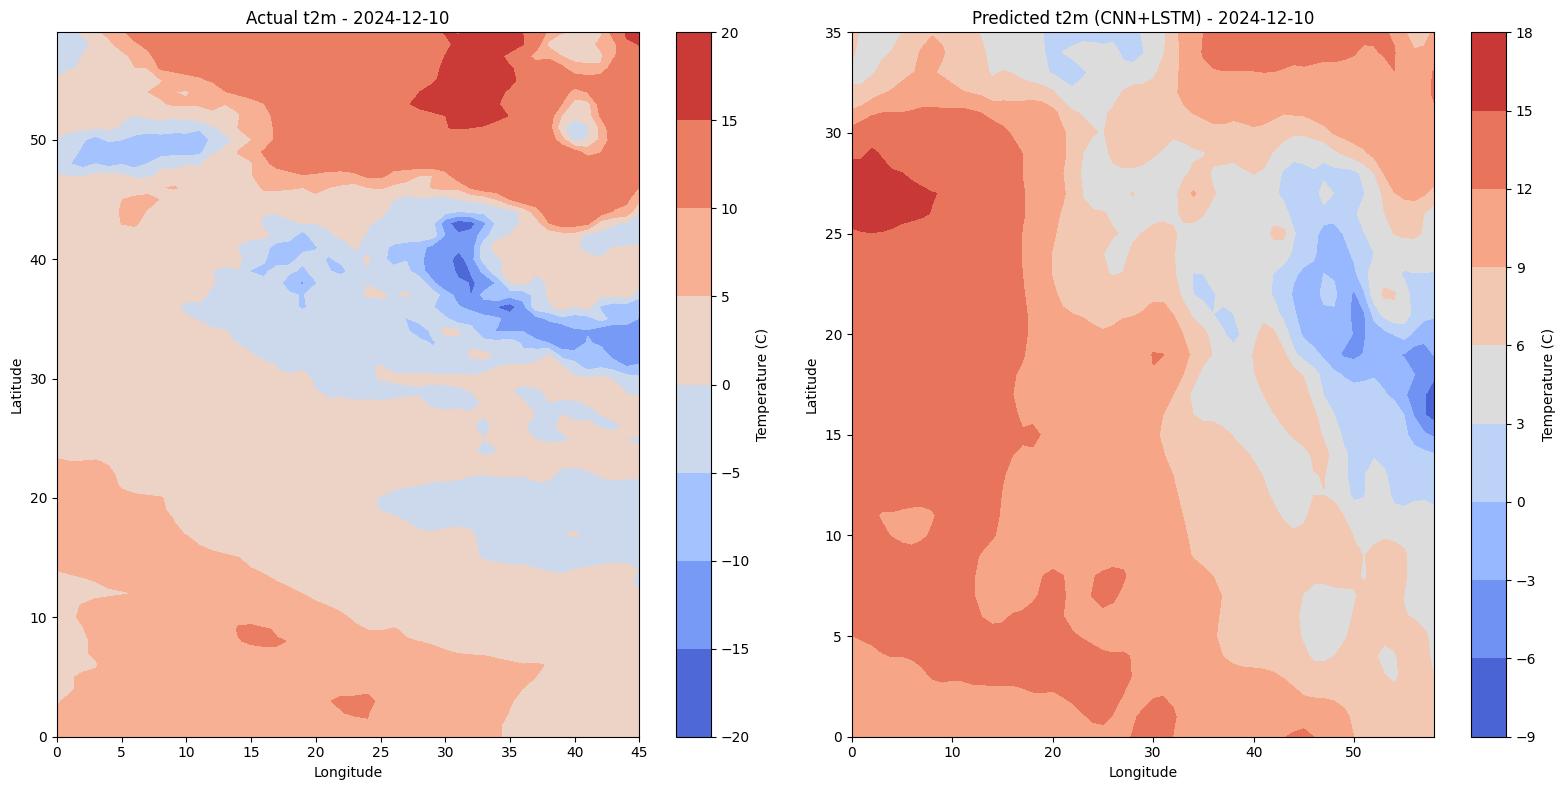

In [ ]:

# # Define bounds for Mont Blanc
# lat_min, lat_max = 45.0, 46.5
# lon_min, lon_max = 6.0, 7.5
# Define bounds
# lat_min, lat_max = 42.5, 47.1
# lon_min, lon_max = 7.6, 18.5

lat_min, lat_max = 40.25, 55.05
lon_min, lon_max = -1.09, 10.4


# Subset the actual data for Mont Blanc region
actual_subset = y_true[2].sel(
    latitude=slice(lat_max, lat_min),  # Latitude descending
    longitude=slice(lon_min, lon_max) # Longitude ascending
)

# Plot the cropped data with the predicted data
plot_t2m(
    actual_subset.values,  # Crop of actual data
    y_pred_cnn_lstm[2],    # Predicted data
    "2024-12-10",
    model_name="CNN+LSTM"
)

Aligned Actual Shape: (36, 59)


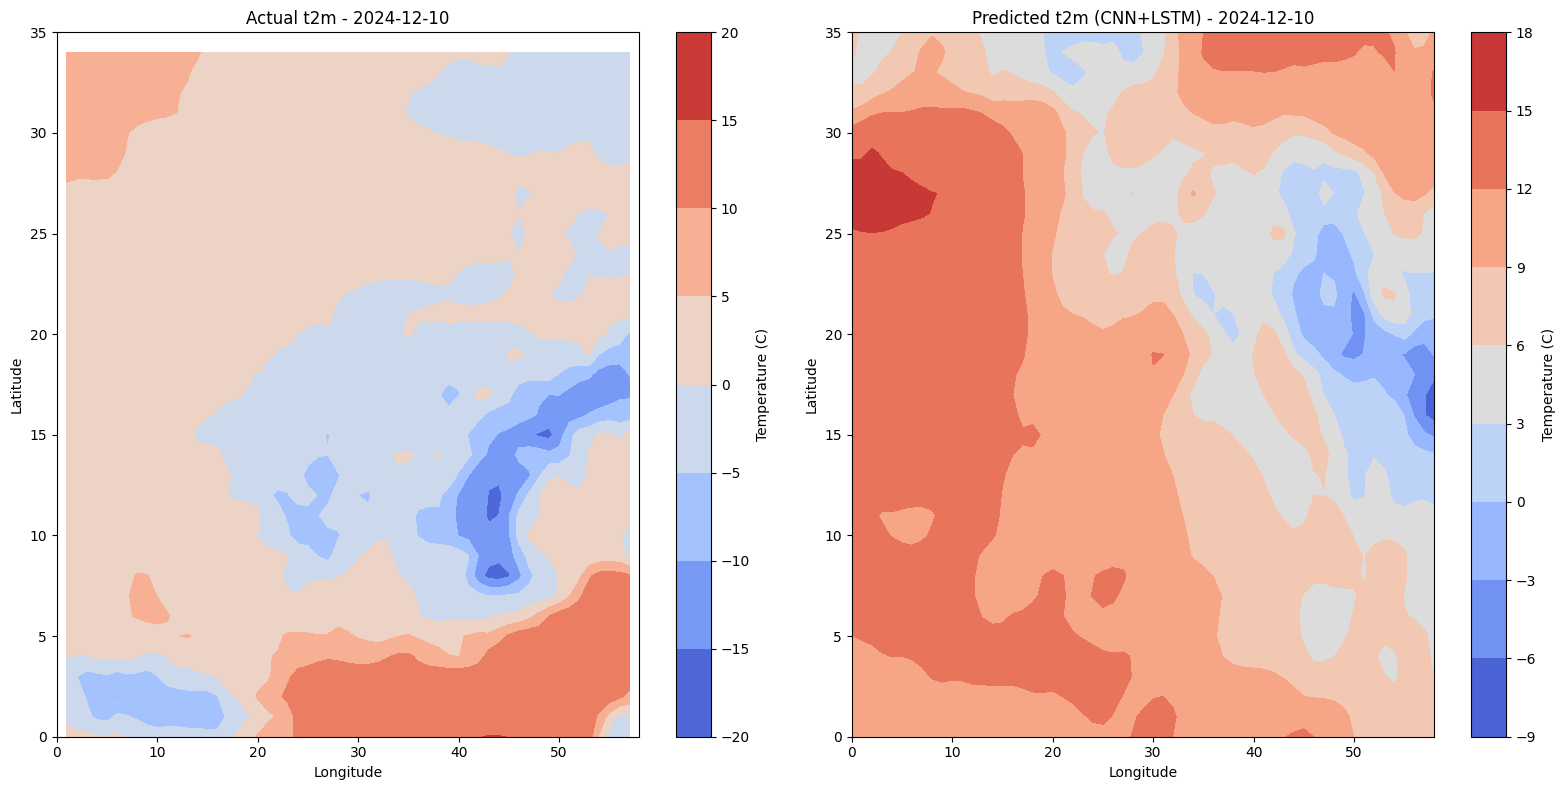

In [ ]:
import numpy as np
from scipy.interpolate import griddata

# Define slightly broader bounds southern France to zoom out
# lat_min, lat_max = 43.55, 51.05
# lon_min, lon_max = -1.09, 9.4

lat_min, lat_max = 42.25, 51.05
lon_min, lon_max = -1.09, 9.4

# Subset the actual data for the broader Mont Blanc region
actual_subset = y_true[2].sel(
    latitude=slice(lat_max, lat_min),  # Latitude descending
    longitude=slice(lon_min, lon_max) # Longitude ascending
)

# Extract the latitude and longitude of the subset
lat_actual_subset = actual_subset.latitude.values
lon_actual_subset = actual_subset.longitude.values
lon_actual_grid, lat_actual_grid = np.meshgrid(lon_actual_subset, lat_actual_subset)

# Define the target grid for interpolation
lat_target = np.linspace(lat_min, lat_max, 36)  # Target latitude grid
lon_target = np.linspace(lon_min, lon_max, 59)  # Target longitude grid
lon_target_grid, lat_target_grid = np.meshgrid(lon_target, lat_target)

# Flatten the actual data and grid for interpolation
actual_flat = actual_subset.values.flatten()
actual_points = np.array([lat_actual_grid.flatten(), lon_actual_grid.flatten()]).T

# Interpolate onto the target grid
aligned_actual = griddata(
    points=actual_points,
    values=actual_flat,
    xi=(lat_target_grid, lon_target_grid),
    method='linear'
)

# Verify the shape
print("Aligned Actual Shape:", aligned_actual.shape)  # Should be (36, 59)

# Plot the broader data with the predicted data
plot_t2m(
    aligned_actual,          # Interpolated actual data
    y_pred_cnn_lstm[2],      # Predicted data
    "2024-12-10",
    model_name="CNN+LSTM"
)


Aligned Actual Shape: (36, 59)

Interpolated Actual Temperature Values:
[[        nan  1.77248304  1.24802183 ... -4.62258162 -1.18620231
          nan]
 [        nan -1.08171955 -2.53997694 ... -1.87145477 -0.1080496
          nan]
 [        nan -1.36052497 -3.47207053 ... 11.1562669   8.19465052
          nan]
 ...
 [        nan  8.62228291  8.56348981 ... -1.41660255 -2.1207682
          nan]
 [        nan  7.16964129  7.24472749 ... -0.10338827 -0.77022324
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]

Predicted Temperature Values (CNN+LSTM):
<xarray.DataArray 't2m' (latitude: 36, longitude: 59)> Size: 8kB
array([[11.75528  , 11.520416 , 11.22403  , ...,  7.2167053,  7.4930725,
         7.631256 ],
       [11.488678 , 11.148834 , 10.686432 , ...,  6.8905334,  7.200592 ,
         7.4945374],
       [11.052643 , 10.751862 , 10.375885 , ...,  6.5677795,  6.5643616,
         6.5936584],
       ...,
       [ 5.4891663,  5.287506 ,  5.70

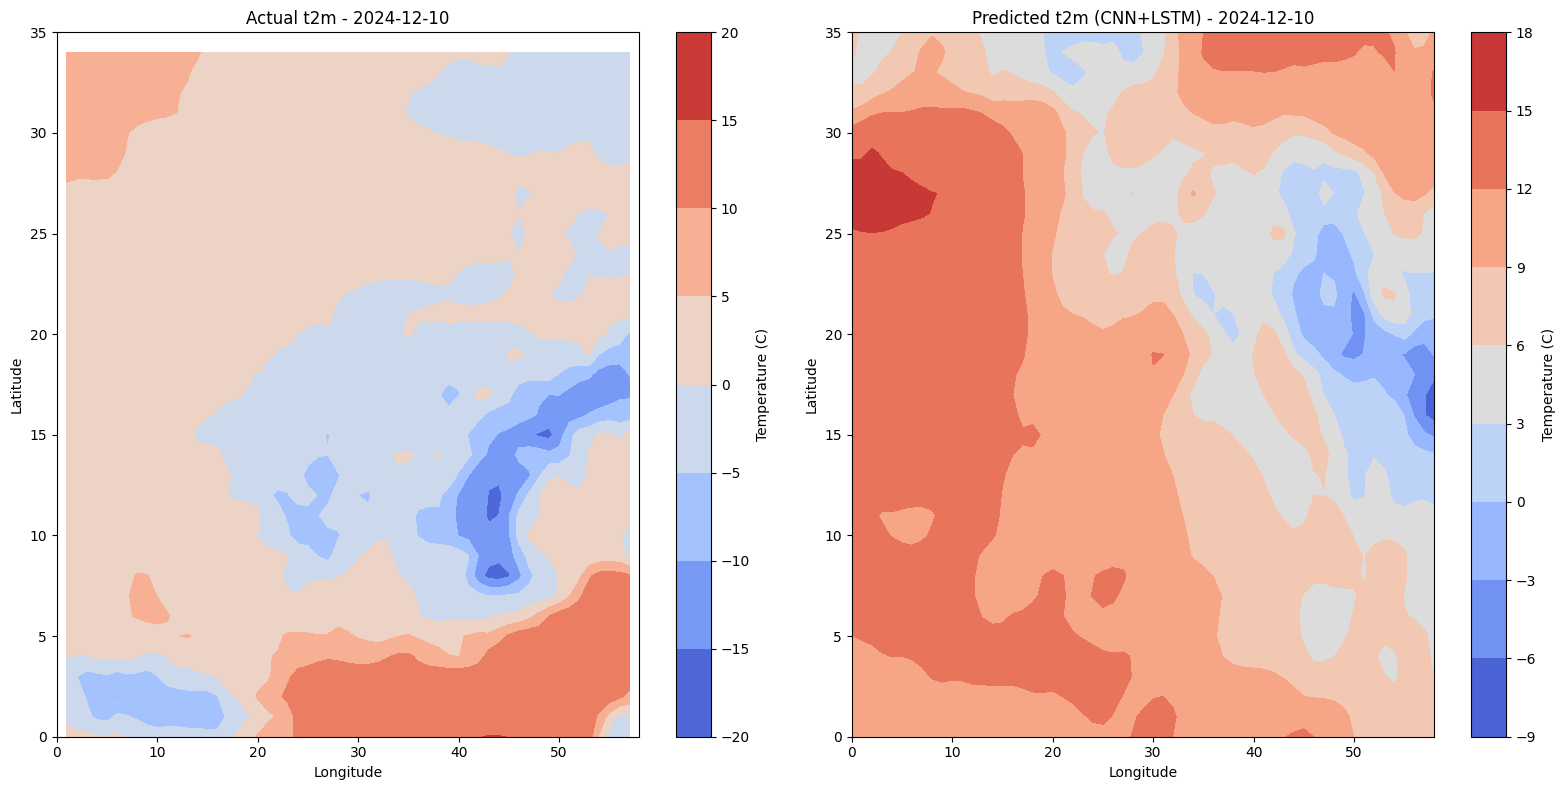

In [ ]:
import numpy as np
from scipy.interpolate import griddata

# Define bounds for the southern France region
# lat_min, lat_max = 43.55, 51.05
# lon_min, lon_max = -1.09, 9.4

lat_min, lat_max = 42.25, 51.05
lon_min, lon_max = -1.09, 9.4

# Subset the actual data for the defined region
actual_subset = y_true[2].sel(
    latitude=slice(lat_max, lat_min),  # Latitude descending
    longitude=slice(lon_min, lon_max) # Longitude ascending
)

# Extract the latitude and longitude of the subset
lat_actual_subset = actual_subset.latitude.values
lon_actual_subset = actual_subset.longitude.values
lon_actual_grid, lat_actual_grid = np.meshgrid(lon_actual_subset, lat_actual_subset)

# Define the target grid for interpolation
lat_target = np.linspace(lat_min, lat_max, 36)  # Target latitude grid
lon_target = np.linspace(lon_min, lon_max, 59)  # Target longitude grid
lon_target_grid, lat_target_grid = np.meshgrid(lon_target, lat_target)

# Flatten the actual data and grid for interpolation
actual_flat = actual_subset.values.flatten()
actual_points = np.array([lat_actual_grid.flatten(), lon_actual_grid.flatten()]).T

# Interpolate onto the target grid
aligned_actual = griddata(
    points=actual_points,
    values=actual_flat,
    xi=(lat_target_grid, lon_target_grid),
    method='linear'
)

# Verify the shape
print("Aligned Actual Shape:", aligned_actual.shape)  # Should be (36, 59)

# # Represent the temperature values for both actual and predicted data
print("\nInterpolated Actual Temperature Values:")
print(aligned_actual)

print("\nPredicted Temperature Values (CNN+LSTM):")
print(y_pred_cnn_lstm[2])

# Plot the data for visual comparison
plot_t2m(
    aligned_actual,          # Interpolated actual data
    y_pred_cnn_lstm[2],      # Predicted data
    "2024-12-10",
    model_name="CNN+LSTM"
)


In [ ]:
# plot_t2m(y_true[2],y_pred_cnn_lstm_day3, "2024-12-10", model_name="Aligned Actual vs Prediction (CNN+LSTM)")

In [ ]:
# plot_t2m(y_true[0], y_pred_lstm[0], "2024-12-09", model_name="LSTM")
